# Medical Image Segmentation Using ü§ó HuggingFace & PyTorch

Medical image segmentation is an innovative process that enables surgeons to have a virtual "x-ray vision." It is a highly valuable tool in healthcare, providing non-invasive diagnostics and in-depth analysis. With this in mind, in this post, we will explore the UW-Madison GI Tract Image Segmentation Kaggle challenge dataset. As part of this project, we will utilize PyTorch along with PyTorch-Lightning. We will use ü§ó HuggingFace transformers to load and fine-tune the Segformer transformer-based model on the medical segmentation dataset. Finally, we will create a Gradio app for image inference and deploy it on HuggingFace spaces.

# Âü∫‰∫éü§óHuggingFace‰∏éPyTorchÁöÑÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤

ÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÊòØ‰∏ÄÈ°πÂàõÊñ∞ÊäÄÊúØÔºåÂÆÉËµã‰∫àÂ§ñÁßëÂåªÁîüËôöÊãüÁöÑ‚ÄúÈÄèËßÜÁúº‚ÄùËÉΩÂäõ„ÄÇ‰Ωú‰∏∫ÂåªÁñóÈ¢ÜÂüüÊûÅÂÖ∑‰ª∑ÂÄºÁöÑÂ∑•ÂÖ∑ÔºåËØ•ÊäÄÊúØÂèØÂÆûÁé∞Êó†ÂàõËØäÊñ≠‰∏éÊ∑±Â∫¶ÂàÜÊûê„ÄÇÂü∫‰∫éÊ≠§ÔºåÊú¨ÊñáÂ∞ÜÊ∑±ÂÖ•Êé¢ËÆ®Â®ÅÊñØÂ∫∑ÊòüÂ§ßÂ≠¶È∫¶Ëø™ÈÄäÂàÜÊ†°ËÉÉËÇ†ÈÅìÂõæÂÉèÂàÜÂâ≤KaggleÊåëÊàòËµõÊï∞ÊçÆÈõÜ„ÄÇÈ°πÁõÆ‰∏≠Êàë‰ª¨Â∞ÜÁªìÂêà‰ΩøÁî®PyTorch‰∏éPyTorch-LightningÊ°ÜÊû∂ÔºåÂÄüÂä©ü§óHuggingFace TransformerÂä†ËΩΩÂπ∂ÈíàÂØπÂåªÂ≠¶ÂàÜÂâ≤Êï∞ÊçÆÈõÜÂØπSegformerÊ®°ÂûãËøõË°åÂæÆË∞É„ÄÇÊúÄÁªàÊûÑÂª∫GradioÂõæÂÉèÊé®ÁêÜÂ∫îÁî®ÔºåÂπ∂ÈÉ®ÁΩ≤Ëá≥HuggingFace SpacesÂπ≥Âè∞„ÄÇ

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_feature_Image.png">

## Table of Contents


* [1 Install & Import Necessary Libraries](#1-Install-&-Import-Necessary-Libraries)
* [2 Set Hyperparameters For The Project](#2-Set-Hyperparameters-For-The-Project)
* [3 Loading The Medical Image Segmentation Dataset](#3-Loading-The-Medical-Image-Segmentation-Dataset)
    * [3.1 Defining A Custom PyTorch Dataset Class For Medical Image Segmentation](#3.1-Defining-A-Custom-PyTorch-Dataset-Class-For-Medical-Image-Segmentation)
    * [3.2 Defining The Custom LightningDataModule Class](#3.2-Defining-The-Custom-LightningDataModule-Class)
    * [3.3 Visualization Helper Functions](#3.3-Visualization-Helper-Functions)
    * [3.4 Display Sample Images From The Dataset](#3.4-Display-Sample-Images-From-The-Dataset)
* [4 Loading SegFormer From ü§ó HuggingFace](#4-Loading-SegFormer-From-ü§ó-HuggingFace)
* [5 Evaluation Metric & Loss Function](#5-Evaluation-Metric--&-Loss-Function)
    * [5.1 Custom Loss Functions - Smooth Dice + Cross-Entropy](#5.1-Custom-Loss-Functions---Smooth-Dice-+-Cross-Entropy)
    * [5.2 Evaluation Metric - Dice Coefficient (F1-Score)](#5.2-Evaluation-Metric---Dice-Coefficient-(F1-Score))
* [6 Creating The Custom LightningModule Class](#6-Creating-The-Custom-LightningModule-Class)
* [7 Start Training](#7-Start-Training)
* [8 Inference on the Medical Segmentation Dataset](#8-Inference-on-the-Medical-Segmentation-Dataset)
    * [8.1 Load The Best Trained Model](#8.1-Load-The-Best-Trained-Model)
    * [8.2 Evaluate Model On Validation Dataset](#8.2-Evaluate-Model-On-Validation-Dataset)
    * [8.3 Image Inference Using DataLoader Objects](#8.3-Image-Inference-Using-DataLoader-Objects)
* [9 Summary](#9-Summary)
## ÁõÆÂΩï


* [1 ÂÆâË£ÖÂπ∂ÂØºÂÖ•ÂøÖË¶ÅÂ∫ì](#1-Install-&-Import-Necessary-Libraries)
* [2 ‰∏∫È°πÁõÆËÆæÁΩÆË∂ÖÂèÇÊï∞](#2-Set-Hyperparameters-For-The-Project)
* [3 Âä†ËΩΩÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤Êï∞ÊçÆÈõÜ](#3-Âä†ËΩΩ-ÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤Êï∞ÊçÆÈõÜ)
    * [3.1 ÂÆö‰πâÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÁöÑËá™ÂÆö‰πâ PyTorch Êï∞ÊçÆÈõÜÁ±ª](#3.1-Defining-A-Custom-PyTorch-Dataset-Class-For-Medical-Image-Segmentation)
    * [3.2 ÂÆö‰πâËá™ÂÆö‰πâ LightningDataModule Á±ª](#3.2-Defining-The-Custom-LightningDataModule-Class)
    * [3.3 ÂèØËßÜÂåñËæÖÂä©ÂáΩÊï∞](#3.3-Visualization-Helper-Functions)
    * [3.4 Â±ïÁ§∫Êï∞ÊçÆÈõÜÊ†∑Êú¨ÂõæÂÉè](#3.4-Display-Sample-Images-From-The-Dataset)
* [4 ‰ªéü§óHuggingFaceÂä†ËΩΩSegFormer](#4-Loading-SegFormer-From-ü§ó-HuggingFace)
* [5 ËØÑ‰º∞ÊåáÊ†á‰∏éÊçüÂ§±ÂáΩÊï∞](#5-Evaluation-Metric--&-Loss-Function)
    * [5.1 Ëá™ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞ - Âπ≥ÊªëDice + ‰∫§ÂèâÁÜµ](#5.1-Custom-Loss-Functions---Smooth-Dice-+-Cross-Entropy)
    * [5.2 ËØÑ‰º∞ÊåáÊ†á - DiceÁ≥ªÊï∞ÔºàF1ÂàÜÊï∞Ôºâ](#5.2-Evaluation-Metric---Dice-Coefficient-(F1-Score))
* [6 ÂàõÂª∫Ëá™ÂÆö‰πâLightningModuleÁ±ª](#6-Creating-The-Custom-LightningModule-Class)
* [7 ÂºÄÂßãËÆ≠ÁªÉ](#7-Start-Training)
* [8 ÂåªÁñóÂàÜÂâ≤Êï∞ÊçÆÈõÜÊé®ÁêÜ](#8-Inference-on-the-Medical-Segmentation-Dataset)
    * [8.1 Âä†ËΩΩÊúÄ‰Ω≥ËÆ≠ÁªÉÊ®°Âûã](#8.1-Load-The-Best-Trained-Model)
    * [8.2 Âú®È™åËØÅÊï∞ÊçÆÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã](#8.2-Evaluate-Model-On-Validation-Dataset)
    * [8.3 ‰ΩøÁî®DataLoaderÂØπË±°ËøõË°åÂõæÂÉèÊé®ÁêÜ](#8.3-Image-Inference-Using-DataLoader-Objects)
* [9 ÊÄªÁªì](#9-Summary)



## What is Medical Image Segmentation?
## ‰ªÄ‰πàÊòØÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤Ôºü

Medical image segmentation is a process that involves dividing medical images, such as CT scans or MRI scans, into distinct regions or structures of interest. This technique is used to identify and isolate specific areas within the image, which is crucial for diagnosis, treatment planning, and monitoring of diseases. It can be done manually by experts or automated using computer algorithms and machine learning. Medical image segmentation plays a vital role in various medical specialties and enables quantitative analysis and precise measurements.

ÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÊòØ‰∏ÄÁßçÂ∞ÜÂåªÂ≠¶ÂΩ±ÂÉèÔºàÂ¶ÇCTÊâ´ÊèèÊàñMRIÊâ´ÊèèÔºâÂàíÂàÜ‰∏∫‰∏çÂêåÂå∫ÂüüÊàñÁõÆÊ†áÁªìÊûÑÁöÑËøáÁ®ã„ÄÇËØ•ÊäÄÊúØÁî®‰∫éËØÜÂà´Âπ∂ÈöîÁ¶ªÂõæÂÉè‰∏≠ÁöÑÁâπÂÆöÂå∫ÂüüÔºåËøôÂØπÁñæÁóÖËØäÊñ≠„ÄÅÊ≤ªÁñóÊñπÊ°àÂà∂ÂÆöÂèäÁóÖÊÉÖÁõëÊµãËá≥ÂÖ≥ÈáçË¶Å„ÄÇËØ•ËøáÁ®ãÂèØÁî±‰∏ìÂÆ∂ÊâãÂä®ÂÆåÊàêÔºå‰πüÂèØÈÄöËøáËÆ°ÁÆóÊú∫ÁÆóÊ≥ïÂíåÊú∫Âô®Â≠¶‰π†ÂÆûÁé∞Ëá™Âä®Âåñ„ÄÇÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤Âú®Â§ö‰∏™ÂåªÂ≠¶È¢ÜÂüüÂèëÊå•ÁùÄÂÖ≥ÈîÆ‰ΩúÁî®Ôºå‰∏∫ÂÆöÈáèÂàÜÊûêÂíåÁ≤æÁ°ÆÊµãÈáèÊèê‰æõ‰∫ÜÂèØËÉΩ„ÄÇ

The dataset for this project is taken from the <a href="https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/overview" target="_blank">UW-Madison GI Tract Image Segmentation</a> Kaggle competition. The dataset consists of 3 classes: the stomach, small bowel, and large bowel.

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_competition_dataset_example.png">

Êú¨È°πÁõÆÊï∞ÊçÆÈõÜÂèñËá™<a href="https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/overview" target="_blank">Â®ÅÊñØÂ∫∑ÊòüÂ§ßÂ≠¶È∫¶Ëø™ÈÄäÂàÜÊ†°ËÉÉËÇ†ÈÅìÂõæÂÉèÂàÜÂâ≤</a>KaggleÁ´ûËµõ„ÄÇËØ•Êï∞ÊçÆÈõÜÂåÖÂê´3Á±ªÁªìÊûÑÔºöËÉÉÈÉ®„ÄÅÂ∞èËÇ†ÂíåÂ§ßËÇ†„ÄÇ

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_competition_dataset_example.png">

**Note:** In this notebook, we'll work with the final processed dataset.

**Ê≥®ÊÑè**:Âú®Êú¨Á¨îËÆ∞‰∏≠ÔºåÊàë‰ª¨Â∞ÜÂ§ÑÁêÜÊúÄÁªàÁöÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÈõÜ„ÄÇ

## 1 Install & Import Necessary Libraries
## 1 ÂÆâË£ÖÂπ∂ÂØºÂÖ•ÂøÖË¶ÅÂ∫ì

Before we begin the coding part, we need to ensure we have all the required libraries installed. For this project, apart from PyTorch, we are installing additional tools to help ease the implementation process.

The major ones are:

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_tool_logos.png">

1. `transformers`: To load SegFormer transformer model.
2. `lightning`: To simplify and structure code implementations.
3. `torchmetrics`: For evaluating the model's performance.
4. `wandb`: For experiment tracking.
5. `albumentations`:  For applying augmentations.

Âú®ÂºÄÂßãÁºñÁ†ÅÈÉ®ÂàÜ‰πãÂâçÔºåÊàë‰ª¨ÈúÄË¶ÅÁ°Æ‰øùÂ∑≤ÂÆâË£ÖÊâÄÊúâÂøÖÈúÄÁöÑÂ∫ì„ÄÇÂØπ‰∫éËøô‰∏™È°πÁõÆÔºåÈô§‰∫ÜPyTorch‰πãÂ§ñÔºåÊàë‰ª¨ËøòÂ∞ÜÂÆâË£ÖÈ¢ùÂ§ñÁöÑÂ∑•ÂÖ∑‰ª•ÁÆÄÂåñÂÆûÁé∞ËøáÁ®ã„ÄÇ

‰∏ªË¶ÅÂ∫ìÂåÖÊã¨Ôºö

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_tool_logos.png">

1. `transformers`ÔºöÁî®‰∫éÂä†ËΩΩSegFormerÂèòÊç¢Âô®Ê®°Âûã„ÄÇ
2. `lightning`ÔºöÁÆÄÂåñÂπ∂ËßÑËåÉ‰ª£Á†ÅÂÆûÁé∞ÁªìÊûÑ„ÄÇ
3. `torchmetrics`ÔºöÁî®‰∫éËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ„ÄÇ
4. `wandb`ÔºöÁî®‰∫éÂÆûÈ™åËøΩË∏™„ÄÇ
5. `albumentations`ÔºöÁî®‰∫éÂ∫îÁî®Êï∞ÊçÆÂ¢ûÂº∫ÊäÄÊúØ„ÄÇ

In [1]:
# Ê£ÄÊü•GPUÂèØÁî®ÊÄß
!nvidia-smi

Tue Oct 14 21:02:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   56C    P5              7W /  117W |    2124MiB /   8188MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

1.2 Import Libraries and Check Environment
### 1.2 ÂØºÂÖ•Â∫ìÂπ∂Ê£ÄÊü•ÁéØÂ¢É

In [2]:
# Á≥ªÁªüÁõ∏ÂÖ≥
import os
import platform
import sys
import warnings
import zipfile
from dataclasses import dataclass
from glob import glob
from typing import Tuple, Dict, Optional

# ÂøΩÁï•Ë≠¶Âëä
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# WindowsÁ≥ªÁªüÁöÑÂ§öËøõÁ®ãËÆæÁΩÆ
print("="*70)
print("Á≥ªÁªü‰ø°ÊÅØÊ£ÄÊü•")
print("="*70)
print(f"PythonÁâàÊú¨: {sys.version.split()[0]}")
print(f"Êìç‰ΩúÁ≥ªÁªü: {platform.system()} {platform.release()}")
print(f"Â∑•‰ΩúÁõÆÂΩï: {os.getcwd()}")

Á≥ªÁªü‰ø°ÊÅØÊ£ÄÊü•
PythonÁâàÊú¨: 3.11.13
Êìç‰ΩúÁ≥ªÁªü: Windows 10
Â∑•‰ΩúÁõÆÂΩï: E:\VSCode_Project\Segformer_medical_lightning


In [3]:
# Êï∞ÊçÆÂ§ÑÁêÜÁõ∏ÂÖ≥
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

# PyTorchÁõ∏ÂÖ≥
import torch
import torch.optim as optim
import torch.nn.functional as F

# ÂêØÁî®cudnn.benchmark‰ª•Âä†ÈÄüËÆ≠ÁªÉ
torch.backends.cudnn.benchmark = True
from torch.utils.data import Dataset, DataLoader

# Êï∞ÊçÆÂ¢ûÂº∫
import albumentations as A
from albumentations.pytorch import ToTensorV2

# HuggingFaceÊ®°Âûã
from transformers import SegformerForSemanticSegmentation

# PyTorch Lightning
import lightning.pytorch as pl
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import LearningRateMonitor, ModelCheckpoint

# ËØÑ‰º∞ÊåáÊ†á
from torchmetrics import MeanMetric
from torchmetrics.classification import MulticlassF1Score

# Ê®°ÂûãÊëòË¶Å
from torchinfo import summary

print("\n" + "="*70)
print("‰æùËµñÂ∫ìÁâàÊú¨‰ø°ÊÅØ")
print("="*70)
print(f"PyTorchÁâàÊú¨: {torch.__version__}")
print(f"NumPyÁâàÊú¨: {np.__version__}")
print(f"OpenCVÁâàÊú¨: {cv2.__version__}")

# Ê£ÄÊü•CUDA
cuda_available = torch.cuda.is_available()
print(f"\nCUDAÂèØÁî®: {cuda_available}")
if cuda_available:
    print(f"CUDAÁâàÊú¨: {torch.version.cuda}")
    print(f"GPUËÆæÂ§á: {torch.cuda.get_device_name(0)}")
    print(f"GPUÊï∞Èáè: {torch.cuda.device_count()}")
    print(f"ÂΩìÂâçGPU: {torch.cuda.current_device()}")
else:
    print("‚ö†Ô∏è Ë≠¶Âëä: CUDA‰∏çÂèØÁî®ÔºåÂ∞Ü‰ΩøÁî®CPUËÆ≠ÁªÉÔºàÈÄüÂ∫¶‰ºöÂæàÊÖ¢Ôºâ")

print("\n‚úì ÊâÄÊúâ‰æùËµñÂ∫ìÂ∑≤ÊàêÂäüÂØºÂÖ•ÔºÅ")

E:\Anaconda\envs\Pytorch\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



‰æùËµñÂ∫ìÁâàÊú¨‰ø°ÊÅØ
PyTorchÁâàÊú¨: 2.6.0+cu124
NumPyÁâàÊú¨: 2.3.3
OpenCVÁâàÊú¨: 4.10.0

CUDAÂèØÁî®: True
CUDAÁâàÊú¨: 12.4
GPUËÆæÂ§á: NVIDIA GeForce RTX 4060 Laptop GPU
GPUÊï∞Èáè: 1
ÂΩìÂâçGPU: 0

‚úì ÊâÄÊúâ‰æùËµñÂ∫ìÂ∑≤ÊàêÂäüÂØºÂÖ•ÔºÅ


For this project, instead of the default tensorboard used by pytorch-lightning for tracking experiments, we will use a proper MLOps tool: Weights & Biases (WandB).

The following code cell will help us to log into our `wandb` account.

The code cell will ask you to paste your API key in the dialogue box. You need to click on the <a href="https://wandb.ai/authorize" target="_blank">Sign In with Auth0</a> link provided.

Âú®Ê≠§È°πÁõÆ‰∏≠ÔºåÊàë‰ª¨Â∞ÜÈááÁî®‰∏ì‰∏öÁöÑMLOpsÂ∑•ÂÖ∑Weights & BiasesÔºàWandBÔºâÊù•ËøΩË∏™ÂÆûÈ™åÔºåËÄåÈùûPyTorch LightningÈªòËÆ§‰ΩøÁî®ÁöÑTensorBoard„ÄÇ

‰ª•‰∏ã‰ª£Á†ÅÂçïÂÖÉÂ∞ÜÂ∏ÆÂä©Êàë‰ª¨ÁôªÂΩï`wandb`Ë¥¶Êà∑„ÄÇ

‰ª£Á†ÅÂçïÂÖÉÊ†ºÂ∞ÜÂú®ÂØπËØùÊ°Ü‰∏≠ÊèêÁ§∫ÊÇ®Á≤òË¥¥APIÂØÜÈí•„ÄÇÊÇ®ÈúÄË¶ÅÁÇπÂáªÊèê‰æõÁöÑ<a href="https://wandb.ai/authorize" target="_blank">‰ΩøÁî®Auth0ÁôªÂΩï</a>ÈìæÊé•„ÄÇ

1.3 Logging into Weights & Biases (Optional)
If you wish to use WandB for experiment tracking, run the code below. Otherwise, you may skip this step.

### 1.3 ÁôªÂΩïWeights & Biases (ÂèØÈÄâ)
Â¶ÇÊûúÊÇ®ÊÉ≥‰ΩøÁî®WandBËøõË°åÂÆûÈ™åËøΩË∏™ÔºåËØ∑ËøêË°å‰∏ãÈù¢ÁöÑ‰ª£Á†Å„ÄÇÂê¶ÂàôÂèØ‰ª•Ë∑≥Ëøá„ÄÇ

In [4]:
# ÁôªÂΩïWandBÔºàÂèØÈÄâÔºâ
USE_WANDB = True  # ËÆæÁΩÆ‰∏∫True‰ª•ÂêØÁî®WandB

if USE_WANDB:
    import wandb
    try:
        wandb.login()
        print("‚úì WandBÁôªÂΩïÊàêÂäüÔºÅ")
    except Exception as e:
        print(f"‚ö†Ô∏è WandBÁôªÂΩïÂ§±Ë¥•: {e}")
        USE_WANDB = False
else:
    print("‚ÑπÔ∏è Ë∑≥ËøáWandBÁôªÂΩïÔºàUSE_WANDB=FalseÔºâ")

wandb: Currently logged in as: tingwulin9 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


‚úì WandBÁôªÂΩïÊàêÂäüÔºÅ


## 2 Set Hyperparameters For The Project
## 2 ‰∏∫È°πÁõÆËÆæÁΩÆË∂ÖÂèÇÊï∞


Next, we will declare all the different hyperparameters used for the project. For this, we are defining three dataclasses. They will be used throughout the notebook.


1. `DatasetConfig`  ‚Äì A class that holds all the hyperparameters we will use to process images. It contains the following information:
    1. Image size to use.
    2. Number of classes present in the dataset,
    3. The mean and standard deviation to use for image normalization.
    4. URL of the preprocessed dataset.
    5. Directory path to download the dataset to.

2. `Paths` ‚Äì This class contains the locations of the images and masks of the train and validation sets. It uses the ‚Äúroot dataset path‚Äù  set DatasetConfig as the base.

3. `TrainingConfig` ‚Äì  A class that holds all the hyperparameters we will use for training and evaluation.  It contains the following information:
    1. Batch size.
    2. Initial learning rate.
    3. The number of epochs to train the model.
    4. The number of workers to use for data loading.
    4. Model, optimizer & learning rate scheduler-related configurations.

4. `InferenceConfig` ‚Äì This class contains the (optional) batch size and the number of batches we will use to display our inference results at the end.

Êé•‰∏ãÊù•ÔºåÊàë‰ª¨Â∞ÜÂ£∞ÊòéÈ°πÁõÆ‰∏≠‰ΩøÁî®ÁöÑÊâÄÊúâ‰∏çÂêåË∂ÖÂèÇÊï∞„ÄÇ‰∏∫Ê≠§ÔºåÊàë‰ª¨ÂÆö‰πâ‰∫Ü‰∏â‰∏™Êï∞ÊçÆÁ±ªÔºåÂÆÉ‰ª¨Â∞ÜÂú®Êï¥‰∏™Á¨îËÆ∞Êú¨‰∏≠‰ΩøÁî®„ÄÇ


1. `DatasetConfig`  ‚Äì Áî®‰∫éÂ≠òÂÇ®ÂõæÂÉèÂ§ÑÁêÜÊâÄÊúâË∂ÖÂèÇÊï∞ÁöÑÁ±ªÔºåÂåÖÂê´‰ª•‰∏ã‰ø°ÊÅØÔºö
    1. ‰ΩøÁî®ÁöÑÂõæÂÉèÂ∞∫ÂØ∏
    2. Êï∞ÊçÆÈõÜ‰∏≠ÁöÑÁ±ªÂà´Êï∞Èáè
    3. ÂõæÂÉèÂΩí‰∏ÄÂåñÊâÄÈúÄÁöÑÂùáÂÄº‰∏éÊ†áÂáÜÂ∑Æ
    4. È¢ÑÂ§ÑÁêÜÊï∞ÊçÆÈõÜÁöÑURL
    5. Êï∞ÊçÆÈõÜ‰∏ãËΩΩÁõÆÂΩïË∑ØÂæÑ

2. `Paths` ‚Äì ËØ•Á±ªÂåÖÂê´ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÂõæÂÉèÂèäÊé©ËÜúÁöÑ‰ΩçÁΩÆÔºå‰ª• DatasetConfig ‰∏≠ËÆæÁΩÆÁöÑ‚ÄúÊ†πÊï∞ÊçÆÈõÜË∑ØÂæÑ‚Äù‰∏∫Âü∫ÂáÜË∑ØÂæÑ„ÄÇ

3. `TrainingConfig` ‚Äì Áî®‰∫éÂ≠òÂÇ®ËÆ≠ÁªÉÂíåËØÑ‰º∞ÊâÄÈúÄÊâÄÊúâË∂ÖÂèÇÊï∞ÁöÑÁ±ªÔºåÂåÖÂê´‰ª•‰∏ã‰ø°ÊÅØÔºö
    1. ÊâπÈáèÂ§ßÂ∞è
    2. ÂàùÂßãÂ≠¶‰π†Áéá
    3. Ê®°ÂûãËÆ≠ÁªÉÁöÑ epoch Êï∞„ÄÇ
    4. Êï∞ÊçÆÂä†ËΩΩ‰ΩøÁî®ÁöÑ worker Êï∞Èáè„ÄÇ
    4. Ê®°Âûã„ÄÅ‰ºòÂåñÂô®ÂèäÂ≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®Áõ∏ÂÖ≥ÈÖçÁΩÆ„ÄÇ

4. `InferenceConfig` ‚Äì ËØ•Á±ªÂåÖÂê´ÔºàÂèØÈÄâÔºâÊâπÈáèÂ§ßÂ∞èÂíåÊâπÊ¨°Êï∞ÈáèÔºåÁî®‰∫éÂú®ÊúÄÁªàÂ±ïÁ§∫Êé®ÁêÜÁªìÊûúÊó∂‰ΩøÁî®„ÄÇ

Note: We‚Äôve uploaded the preprocessed dataset to our Dropbox and <a href="https://www.kaggle.com/datasets/learnopencvblog/uwm-gi-tract-segmentation-img-msk-split" target="_blank">Kaggle</a> accounts. There are two options. You can manually download the dataset and move it to your workstation or utilize the data download code we‚Äôve written below to do it automatically.

Ê≥®ÔºöÊàë‰ª¨Â∑≤Â∞ÜÈ¢ÑÂ§ÑÁêÜÂêéÁöÑÊï∞ÊçÆÈõÜ‰∏ä‰º†Ëá≥DropboxÂíå<a href="https://www.kaggle.com/datasets/learnopencvblog/uwm-gi-tract-segmentation-img-msk-split" target="_blank">Kaggle</a>Ë¥¶Êà∑„ÄÇÊÇ®Êúâ‰∏§ÁßçÈÄâÊã©Ôºö ÊÇ®ÂèØÊâãÂä®‰∏ãËΩΩÊï∞ÊçÆÈõÜÂπ∂Â∞ÜÂÖ∂ÁßªÂä®Ëá≥Â∑•‰ΩúÁ´ôÔºåÊàñ‰ΩøÁî®Êàë‰ª¨ÁºñÂÜôÁöÑÊï∞ÊçÆ‰∏ãËΩΩ‰ª£Á†ÅÂÆûÁé∞Ëá™Âä®‰∏ãËΩΩ„ÄÇ

In [5]:
@dataclass(frozen=True)
class DatasetConfig:
    """Êï∞ÊçÆÈõÜÈÖçÁΩÆ"""
    NUM_CLASSES: int = 4  # ÂåÖÊã¨ËÉåÊôØ
    IMAGE_SIZE: Tuple[int, int] = (288, 288)  # (ÂÆΩ, È´ò)
    MEAN: Tuple[float, float, float] = (0.485, 0.456, 0.406)  # ImageNetÂùáÂÄº
    STD: Tuple[float, float, float] = (0.229, 0.224, 0.225)   # ImageNetÊ†áÂáÜÂ∑Æ
    BACKGROUND_CLS_ID: int = 0
    
    # Êï∞ÊçÆÈõÜ‰∏ãËΩΩURLÔºàDropboxÔºâ
    URL: str = r"https://www.dropbox.com/scl/fi/r0685arupp33sy31qhros/dataset_UWM_GI_Tract_train_valid.zip?rlkey=w4ga9ysfiuz8vqbbywk0rdnjw&dl=1"
    
    # Êï∞ÊçÆÈõÜÂ≠òÂÇ®Ë∑ØÂæÑ
    DATASET_PATH: str = os.path.join(os.getcwd(), "dataset_UWM_GI_Tract_train_valid")


@dataclass(frozen=True)
class Paths:
    """Êï∞ÊçÆË∑ØÂæÑÈÖçÁΩÆ"""
    # ËÆ≠ÁªÉÈõÜË∑ØÂæÑ
    DATA_TRAIN_IMAGES: str = os.path.join(DatasetConfig.DATASET_PATH, "train", "images", r"*.png")
    DATA_TRAIN_LABELS: str = os.path.join(DatasetConfig.DATASET_PATH, "train", "masks", r"*.png")
    
    # È™åËØÅÈõÜË∑ØÂæÑ
    DATA_VALID_IMAGES: str = os.path.join(DatasetConfig.DATASET_PATH, "valid", "images", r"*.png")
    DATA_VALID_LABELS: str = os.path.join(DatasetConfig.DATASET_PATH, "valid", "masks", r"*.png")


@dataclass
class TrainingConfig:
    """ËÆ≠ÁªÉÈÖçÁΩÆ"""
    # Âü∫Á°ÄËÆ≠ÁªÉÂèÇÊï∞
    BATCH_SIZE: int = 6  # ÊñπÊ°à3: Âπ≥Ë°°ÊÄßËÉΩ‰∏éÊòæÂ≠òÔºåÈÄÇÂêà8GB GPU
    NUM_EPOCHS: int = 100
    INIT_LR: float = 3e-4
    
    # Êï∞ÊçÆÂä†ËΩΩ
    NUM_WORKERS: int = 0  # WindowsÂ§öËøõÁ®ã‰∏çÁ®≥ÂÆö,ÊöÇÊó∂Á¶ÅÁî®
    
    # ‰ºòÂåñÂô®ÈÖçÁΩÆ
    OPTIMIZER_NAME: str = "AdamW"
    WEIGHT_DECAY: float = 1e-4
    
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
    USE_SCHEDULER: bool = True
    SCHEDULER: str = "MultiStepLR"
    
    # Ê®°ÂûãÈÖçÁΩÆ
    MODEL_NAME: str = "nvidia/segformer-b0-finetuned-ade-512-512"
    # ÂèØÈÄâÊõ¥Â∞èÁöÑÊ®°Âûã: "nvidia/segformer-b0-finetuned-ade-512-512"
    

@dataclass
class InferenceConfig:
    """Êé®ÁêÜÈÖçÁΩÆ"""
    BATCH_SIZE: int = 6  # ‰∏éËÆ≠ÁªÉÈÖçÁΩÆ‰øùÊåÅ‰∏ÄËá¥
    NUM_BATCHES: int = 2  # ÂèØËßÜÂåñÁöÑÊâπÊ¨°Êï∞


# ÊâìÂç∞ÈÖçÁΩÆ‰ø°ÊÅØ
print("="*70)
print("ÈÖçÁΩÆ‰ø°ÊÅØ")
print("="*70)
print(f"\nÊï∞ÊçÆÈõÜÈÖçÁΩÆ:")
print(f"  - ÂõæÂÉèÂ§ßÂ∞è: {DatasetConfig.IMAGE_SIZE}")
print(f"  - Á±ªÂà´Êï∞Èáè: {DatasetConfig.NUM_CLASSES}")
print(f"  - Êï∞ÊçÆÈõÜË∑ØÂæÑ: {DatasetConfig.DATASET_PATH}")

print(f"\nËÆ≠ÁªÉÈÖçÁΩÆ:")
print(f"  - ÊâπÊ¨°Â§ßÂ∞è: {TrainingConfig.BATCH_SIZE}")
print(f"  - ËÆ≠ÁªÉËΩÆÊï∞: {TrainingConfig.NUM_EPOCHS}")
print(f"  - ÂàùÂßãÂ≠¶‰π†Áéá: {TrainingConfig.INIT_LR}")
print(f"  - ‰ºòÂåñÂô®: {TrainingConfig.OPTIMIZER_NAME}")
print(f"  - Ê®°Âûã: {TrainingConfig.MODEL_NAME.split('/')[-1]}")
print(f"  - Êï∞ÊçÆÂä†ËΩΩÁ∫øÁ®ãÊï∞: {TrainingConfig.NUM_WORKERS}")

print("\n‚úì ÈÖçÁΩÆÂä†ËΩΩÂÆåÊàêÔºÅ")

ÈÖçÁΩÆ‰ø°ÊÅØ

Êï∞ÊçÆÈõÜÈÖçÁΩÆ:
  - ÂõæÂÉèÂ§ßÂ∞è: (288, 288)
  - Á±ªÂà´Êï∞Èáè: 4
  - Êï∞ÊçÆÈõÜË∑ØÂæÑ: E:\VSCode_Project\Segformer_medical_lightning\dataset_UWM_GI_Tract_train_valid

ËÆ≠ÁªÉÈÖçÁΩÆ:
  - ÊâπÊ¨°Â§ßÂ∞è: 6
  - ËÆ≠ÁªÉËΩÆÊï∞: 100
  - ÂàùÂßãÂ≠¶‰π†Áéá: 0.0003
  - ‰ºòÂåñÂô®: AdamW
  - Ê®°Âûã: segformer-b0-finetuned-ade-512-512
  - Êï∞ÊçÆÂä†ËΩΩÁ∫øÁ®ãÊï∞: 0

‚úì ÈÖçÁΩÆÂä†ËΩΩÂÆåÊàêÔºÅ


In [6]:
# PyTorchÈÖçÁΩÆ
# ËÆæÁΩÆfloat32Áü©Èòµ‰πòÊ≥ïÁ≤æÂ∫¶
torch.set_float32_matmul_precision('high')

# ‰ºòÂåñCUDAÂÜÖÂ≠òÂàÜÈÖçÔºàÈÅøÂÖçÁ¢éÁâáÂåñÔºâ
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# ÂêØÁî®Á°ÆÂÆöÊÄßÁÆóÊ≥ïÔºàÊèêÈ´òÂèØÈáçÂ§çÊÄßÔºâ
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

# MatplotlibÈÖçÁΩÆ
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

print("‚úì PyTorchÂíåMatplotlibÈÖçÁΩÆÂÆåÊàêÔºÅ")

‚úì PyTorchÂíåMatplotlibÈÖçÁΩÆÂÆåÊàêÔºÅ


## 3 Loading The Medical Image Segmentation Dataset
## 3 Âä†ËΩΩÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤Êï∞ÊçÆÈõÜ

**Set class ID to RGB color mapping and vice versa.**

**Â∞ÜÁ±ªIDÊò†Â∞ÑËá≥RGBÈ¢úËâ≤ÂÄºÔºåÂèç‰πã‰∫¶ÁÑ∂„ÄÇ**

In [7]:
# Á±ªÂà´IDÂà∞RGBÈ¢úËâ≤ÁöÑÊò†Â∞Ñ
id2color = {
    0: (0, 0, 0),      # ËÉåÊôØ - ÈªëËâ≤
    1: (0, 0, 255),    # ËÉÉÈÉ® - ËìùËâ≤
    2: (0, 255, 0),    # Â∞èËÇ† - ÁªøËâ≤
    3: (255, 0, 0),    # Â§ßËÇ† - Á∫¢Ëâ≤
}

# Á±ªÂà´ÂêçÁß∞
id2name = {
    0: "Background (ËÉåÊôØ)",
    1: "Stomach (ËÉÉÈÉ®)",
    2: "Small Bowel (Â∞èËÇ†)",
    3: "Large Bowel (Â§ßËÇ†)"
}

# ÂèçÂêëÊò†Â∞ÑÔºàRGBÂà∞IDÔºâ
color2id = {value: key for key, value in id2color.items()}

# È™åËØÅÁ±ªÂà´Êï∞Èáè
assert DatasetConfig.NUM_CLASSES == len(id2color), "Á±ªÂà´Êï∞Èáè‰∏çÂåπÈÖçÔºÅ"

print("="*70)
print("Á±ªÂà´‰ø°ÊÅØ")
print("="*70)
for class_id, color in id2color.items():
    print(f"Á±ªÂà´ {class_id}: {id2name[class_id]:<25} RGB{color}")
print("\n‚úì Á±ªÂà´Êò†Â∞ÑËÆæÁΩÆÂÆåÊàêÔºÅ")

Á±ªÂà´‰ø°ÊÅØ
Á±ªÂà´ 0: Background (ËÉåÊôØ)           RGB(0, 0, 0)
Á±ªÂà´ 1: Stomach (ËÉÉÈÉ®)              RGB(0, 0, 255)
Á±ªÂà´ 2: Small Bowel (Â∞èËÇ†)          RGB(0, 255, 0)
Á±ªÂà´ 3: Large Bowel (Â§ßËÇ†)          RGB(255, 0, 0)

‚úì Á±ªÂà´Êò†Â∞ÑËÆæÁΩÆÂÆåÊàêÔºÅ


### 3.1 Defining A Custom PyTorch Dataset Class For Medical Image Segmentation
### 3.1 ÂÆö‰πâÁî®‰∫éÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÁöÑËá™ÂÆö‰πâ PyTorch Êï∞ÊçÆÈõÜÁ±ª

First, we will define our custom PyTorch `Dataset` class. This custom is designed to load images and masks for each image. The `Dataset` class is essential for efficient and organized data handling in machine learning tasks. It provides a standardized interface to load and preprocess data samples from various sources. Encapsulating the dataset into a single object simplifies data management. It enables seamless integration with other PyTorch components like data loaders and models.¬†

The custom class performs the following functions:

1. Load each image-mask pair.
2. Apply geometric and pixel augmentations if the pair belongs to the training set.
3. Apply preprocessing transformations such as normalization and standardization.

È¶ñÂÖàÔºåÊàë‰ª¨Â∞ÜÂÆö‰πâËá™ÂÆö‰πâÁöÑPyTorch `Dataset`Á±ª„ÄÇËØ•Á±ªÊó®Âú®Âä†ËΩΩÂõæÂÉèÂèäÂÖ∂ÂØπÂ∫îÁöÑÊé©ËÜú„ÄÇ`Dataset`Á±ªÂØπ‰∫éÊú∫Âô®Â≠¶‰π†‰ªªÂä°‰∏≠È´òÊïàÊúâÂ∫èÁöÑÊï∞ÊçÆÂ§ÑÁêÜËá≥ÂÖ≥ÈáçË¶ÅÔºåÂÆÉÊèê‰æõ‰∫Ü‰∏Ä‰∏™Ê†áÂáÜÂåñÊé•Âè£ÔºåÁî®‰∫é‰ªé‰∏çÂêåÊù•Ê∫êÂä†ËΩΩÂπ∂È¢ÑÂ§ÑÁêÜÊï∞ÊçÆÊ†∑Êú¨„ÄÇÂ∞ÜÊï∞ÊçÆÈõÜÂ∞ÅË£Ö‰∏∫Âçï‰∏ÄÂØπË±°ÂèØÁÆÄÂåñÊï∞ÊçÆÁÆ°ÁêÜÔºåÂπ∂ËÉΩ‰∏éÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÅÊ®°ÂûãÁ≠âÂÖ∂‰ªñPyTorchÁªÑ‰ª∂Êó†ÁºùÈõÜÊàê„ÄÇ

ËØ•Ëá™ÂÆö‰πâÁ±ªÊâßË°å‰ª•‰∏ãÂäüËÉΩÔºö

1. Âä†ËΩΩÊØèÁªÑÂõæÂÉè-Êé©ËÜúÈÖçÂØπÊï∞ÊçÆ
2. Ëã•ÈÖçÂØπÊï∞ÊçÆÂ±û‰∫éËÆ≠ÁªÉÈõÜÔºåÂàôÂ∫îÁî®Âá†‰Ωï‰∏éÂÉèÁ¥†Â¢ûÂº∫Êìç‰Ωú
3. ÊâßË°åÈ¢ÑÂ§ÑÁêÜÂèòÊç¢ÔºåÂ¶ÇÂΩí‰∏ÄÂåñ‰∏éÊ†áÂáÜÂåñÂ§ÑÁêÜ

In [8]:
class MedicalDataset(Dataset):
    """ÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤Êï∞ÊçÆÈõÜ
    
    ÂäüËÉΩ:
    1. Âä†ËΩΩÂõæÂÉèÂíåÂØπÂ∫îÁöÑÂàÜÂâ≤Êé©Á†Å
    2. ÂØπËÆ≠ÁªÉÈõÜÂ∫îÁî®Êï∞ÊçÆÂ¢ûÂº∫
    3. Ê†áÂáÜÂåñÂíåÂΩí‰∏ÄÂåñÂõæÂÉè
    """
    
    def __init__(
        self, 
        *,  # Âº∫Âà∂‰ΩøÁî®ÂÖ≥ÈîÆÂ≠óÂèÇÊï∞
        image_paths: list,
        mask_paths: list,
        img_size: Tuple[int, int],
        ds_mean: Tuple[float, float, float],
        ds_std: Tuple[float, float, float],
        is_train: bool = False
    ):
        """ÂàùÂßãÂåñÊï∞ÊçÆÈõÜ
        
        Args:
            image_paths: ÂõæÂÉèÊñá‰ª∂Ë∑ØÂæÑÂàóË°®
            mask_paths: Êé©Á†ÅÊñá‰ª∂Ë∑ØÂæÑÂàóË°®
            img_size: ÂõæÂÉèÂ§ßÂ∞è (ÂÆΩ, È´ò)
            ds_mean: ÂΩí‰∏ÄÂåñÂùáÂÄº
            ds_std: ÂΩí‰∏ÄÂåñÊ†áÂáÜÂ∑Æ
            is_train: ÊòØÂê¶‰∏∫ËÆ≠ÁªÉÈõÜÔºàÂÜ≥ÂÆöÊòØÂê¶‰ΩøÁî®Êï∞ÊçÆÂ¢ûÂº∫Ôºâ
        """
        assert len(image_paths) == len(mask_paths), "ÂõæÂÉèÂíåÊé©Á†ÅÊï∞Èáè‰∏çÂåπÈÖçÔºÅ"
        
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.is_train = is_train
        self.img_size = img_size
        self.ds_mean = ds_mean
        self.ds_std = ds_std
        self.transforms = self.setup_transforms(mean=self.ds_mean, std=self.ds_std)

    def __len__(self) -> int:
        """ËøîÂõûÊï∞ÊçÆÈõÜÂ§ßÂ∞è"""
        return len(self.image_paths)

    def setup_transforms(self, *, mean, std) -> A.Compose:
        """ËÆæÁΩÆÊï∞ÊçÆÂ¢ûÂº∫ÂíåÈ¢ÑÂ§ÑÁêÜÂèòÊç¢
        
        ËÆ≠ÁªÉÈõÜÂ¢ûÂº∫ÂåÖÊã¨:
        - ÈöèÊú∫Ê∞¥Âπ≥/ÂûÇÁõ¥ÁøªËΩ¨
        - ÈöèÊú∫ÊóãËΩ¨„ÄÅÁº©Êîæ„ÄÅÂπ≥Áßª
        - ÈöèÊú∫‰∫ÆÂ∫¶ÂØπÊØîÂ∫¶Ë∞ÉÊï¥
        - ÈöèÊú∫ÈÅÆÊå°(Coarse Dropout)
        
        ÊâÄÊúâÊï∞ÊçÆÈõÜÈÉΩ‰ºöËøõË°å:
        - ÂΩí‰∏ÄÂåñ
        - ËΩ¨Êç¢‰∏∫TensorÊ†ºÂºè
        """
        transforms = []

        # ËÆ≠ÁªÉÈõÜÊï∞ÊçÆÂ¢ûÂº∫
        if self.is_train:
            transforms.extend([
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.5),
                A.ShiftScaleRotate(
                    scale_limit=0.12, 
                    rotate_limit=15, 
                    shift_limit=0.12, 
                    p=0.5
                ),
                A.RandomBrightnessContrast(p=0.5),
                A.CoarseDropout(
                    max_holes=8,
                    max_height=self.img_size[1] // 20,
                    max_width=self.img_size[0] // 20,
                    min_holes=5,
                    fill_value=0,
                    mask_fill_value=0,
                    p=0.5
                )
            ])

        # È¢ÑÂ§ÑÁêÜÂèòÊç¢ÔºàÂΩí‰∏ÄÂåñ + ËΩ¨TensorÔºâ
        transforms.extend([
            A.Normalize(mean=mean, std=std, always_apply=True),
            ToTensorV2(),  # (H, W, C) -> (C, H, W)
        ])
        
        return A.Compose(transforms)

    def load_file(self, file_path: str, depth: int = 0) -> np.ndarray:
        """Âä†ËΩΩÂπ∂Ë∞ÉÊï¥ÂõæÂÉè/Êé©Á†ÅÂ§ßÂ∞è
        
        Args:
            file_path: Êñá‰ª∂Ë∑ØÂæÑ
            depth: ËØªÂèñÊ®°Âºè (0=ÁÅ∞Â∫¶Âõæ, cv2.IMREAD_COLOR=ÂΩ©Ëâ≤Âõæ)
            
        Returns:
            Ë∞ÉÊï¥Â§ßÂ∞èÂêéÁöÑÂõæÂÉèÊï∞ÁªÑ
        """
        file = cv2.imread(file_path, depth)
        
        # Â¶ÇÊûúÊòØÂΩ©Ëâ≤ÂõæÔºåËΩ¨Êç¢BGRÂà∞RGB
        if depth == cv2.IMREAD_COLOR:
            file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
            
        # Ë∞ÉÊï¥Â§ßÂ∞è
        return cv2.resize(file, self.img_size, interpolation=cv2.INTER_NEAREST)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        """Ëé∑ÂèñÂçï‰∏™Ê†∑Êú¨
        
        Args:
            index: Ê†∑Êú¨Á¥¢Âºï
            
        Returns:
            (image, mask) ÂÖÉÁªÑ
        """
        # Âä†ËΩΩÂõæÂÉèÂíåÊé©Á†Å
        image = self.load_file(self.image_paths[index], depth=cv2.IMREAD_COLOR)
        mask = self.load_file(self.mask_paths[index], depth=cv2.IMREAD_GRAYSCALE)
        
        # Â∫îÁî®ÂèòÊç¢
        transformed = self.transforms(image=image, mask=mask)
        image, mask = transformed["image"], transformed["mask"].to(torch.long)
        
        return image, mask


print("‚úì MedicalDatasetÁ±ªÂÆö‰πâÂÆåÊàêÔºÅ")

‚úì MedicalDatasetÁ±ªÂÆö‰πâÂÆåÊàêÔºÅ


### 3.2 Defining The Custom LightningDataModule Class
### 3.2 ÂÆö‰πâËá™ÂÆö‰πâ LightningDataModule Á±ª

In this section, we will define the custom `MedicalSegmentationDataModule` class inherited from Lightning‚Äôs `LightningDataModule` class. It helps organize and encapsulate all the data-related operations and logic in a PyTorch project. It acts as a bridge between your data and Lightning‚Äôs training pipeline. It is a convenient abstraction that encapsulates data-related operations, promotes code organization, and facilitates seamless integration with other Lightning components for efficient and reproducible deep-learning experiments.

The class will perform the following functions:

1. Download the dataset from Dropbox.
2. Create a MedicalDataset class object for each set.
3. Create and return the DataLoader objects for each set.


The class methods we need to define are as follows:

1. `prepare_data(..)`: This method is used for data preparation, like downloading and one-time preprocessing with the dataset. When training in a distributed setting, this will be called from each GPU machine.
2. `setup(...)`:  When you want to perform data operations on every GPU, this method is apt for it will call from every GPU. For example, perform train/val/test splits.
3. `train_dataloader(...)`: This method returns the train dataloader.
4. `val_dataloader(...)` : This method returns validation dataloader.

Âú®Êú¨ËäÇ‰∏≠ÔºåÊàë‰ª¨Â∞ÜÂÆö‰πâÁªßÊâøËá™LightningÁöÑ`LightningDataModule`Á±ªÁöÑËá™ÂÆö‰πâ`MedicalSegmentationDataModule`Á±ª„ÄÇËØ•Á±ªÊúâÂä©‰∫éÂú®PyTorchÈ°πÁõÆ‰∏≠ÁªÑÁªáÂíåÂ∞ÅË£ÖÊâÄÊúâÊï∞ÊçÆÁõ∏ÂÖ≥ÁöÑÊìç‰Ωú‰∏éÈÄªËæëÔºåÂÖÖÂΩìÊï∞ÊçÆ‰∏éLightningËÆ≠ÁªÉÁÆ°ÈÅì‰πãÈó¥ÁöÑÊ°•Ê¢Å„ÄÇËØ•Á±ªÊèê‰æõ‰æøÊç∑ÁöÑÊäΩË±°Â∞ÅË£ÖÔºåÊó¢ËÉΩ‰øÉËøõ‰ª£Á†ÅÁªÑÁªáÔºåÂèàËÉΩÂÆûÁé∞‰∏éÂÖ∂‰ªñLightningÁªÑ‰ª∂ÁöÑÊó†ÁºùÈõÜÊàêÔºå‰ªéËÄåÈ´òÊïàÂºÄÂ±ïÂèØÂ§çÁé∞ÁöÑÊ∑±Â∫¶Â≠¶‰π†ÂÆûÈ™å„ÄÇ

ËØ•Á±ªÂ∞ÜÊâßË°å‰ª•‰∏ãÂäüËÉΩÔºö

1. ‰ªéDropbox‰∏ãËΩΩÊï∞ÊçÆÈõÜ
2. ‰∏∫ÊØè‰∏™Êï∞ÊçÆÈõÜÂàõÂª∫MedicalDatasetÁ±ªÂØπË±°
3. ‰∏∫ÊØè‰∏™Êï∞ÊçÆÈõÜÂàõÂª∫Âπ∂ËøîÂõûDataLoaderÂØπË±°„ÄÇ


ÈúÄÂÆö‰πâÁöÑÁ±ªÊñπÊ≥ïÂ¶Ç‰∏ãÔºö

1. `prepare_data(..)`ÔºöÁî®‰∫éÊï∞ÊçÆÂáÜÂ§áÊìç‰ΩúÔºåÂ¶Ç‰∏ãËΩΩÊï∞ÊçÆÈõÜÂèä‰∏ÄÊ¨°ÊÄßÈ¢ÑÂ§ÑÁêÜ„ÄÇÂàÜÂ∏ÉÂºèËÆ≠ÁªÉÊó∂ÔºåËØ•ÊñπÊ≥ïÂ∞ÜÂú®ÊØèÂè∞GPUÊú∫Âô®‰∏äË∞ÉÁî®„ÄÇ
2. `setup(...)`ÔºöÂΩìÈúÄË¶ÅÂØπÊâÄÊúâGPUÊâßË°åÊï∞ÊçÆÊìç‰ΩúÊó∂ÔºåÊ≠§ÊñπÊ≥ïÂèØÂÆûÁé∞ÂÖ®Â±ÄË∞ÉÁî®Ôºå‰æãÂ¶ÇÊâßË°åËÆ≠ÁªÉ/È™åËØÅ/ÊµãËØïÈõÜÂàíÂàÜ„ÄÇ
3. `train_dataloader(...)`ÔºöËøîÂõûËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÇ
4. `val_dataloader(...)`ÔºöËøîÂõûÈ™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÇ

In [9]:
class MedicalSegmentationDataModule(pl.LightningDataModule):
    """ÂåªÂ≠¶ÂàÜÂâ≤Êï∞ÊçÆÊ®°Âùó
    
    ÂäüËÉΩ:
    1. Ëá™Âä®‰∏ãËΩΩÂíåËß£ÂéãÊï∞ÊçÆÈõÜ
    2. ÂàõÂª∫ËÆ≠ÁªÉÂíåÈ™åËØÅÊï∞ÊçÆÈõÜ
    3. ËøîÂõûDataLoaderÂØπË±°
    """
    
    def __init__(
        self,
        num_classes: int = 4,
        img_size: Tuple[int, int] = (288, 288),
        ds_mean: Tuple[float, float, float] = (0.485, 0.456, 0.406),
        ds_std: Tuple[float, float, float] = (0.229, 0.224, 0.225),
        batch_size: int = 32,
        num_workers: int = 0,
        pin_memory: bool = False,
        shuffle_validation: bool = False,
    ):
        super().__init__()

        self.num_classes = num_classes
        self.img_size = img_size
        self.ds_mean = ds_mean
        self.ds_std = ds_std
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        self.shuffle_validation = shuffle_validation

    def prepare_data(self):
        """‰∏ãËΩΩÂíåÂáÜÂ§áÊï∞ÊçÆÔºà‰ªÖÂú®‰∏ªËøõÁ®ãÊâßË°å‰∏ÄÊ¨°Ôºâ"""
        dataset_zip_path = f"{DatasetConfig.DATASET_PATH}.zip"

        # Ê£ÄÊü•Êï∞ÊçÆÈõÜÊòØÂê¶Â∑≤Â≠òÂú®
        if os.path.exists(DatasetConfig.DATASET_PATH):
            print(f"‚úì Êï∞ÊçÆÈõÜÂ∑≤Â≠òÂú®: {DatasetConfig.DATASET_PATH}")
            return

        print(f"\nÊ≠£Âú®‰∏ãËΩΩÊï∞ÊçÆÈõÜ...")
        print(f"URL: {DatasetConfig.URL[:50]}...")
        
        try:
            # ‰∏ãËΩΩÊï∞ÊçÆÈõÜ
            response = requests.get(DatasetConfig.URL, stream=True)
            total_size = int(response.headers.get('content-length', 0))
            
            with open(dataset_zip_path, "wb") as f:
                downloaded = 0
                for chunk in response.iter_content(chunk_size=8192):
                    if chunk:
                        f.write(chunk)
                        downloaded += len(chunk)
                        if total_size > 0:
                            progress = downloaded / total_size * 100
                            print(f"\r‰∏ãËΩΩËøõÂ∫¶: {progress:.1f}%", end="")
            
            print("\n‰∏ãËΩΩÂÆåÊàêÔºÅÊ≠£Âú®Ëß£Âéã...")
            
            # Ëß£ÂéãÊï∞ÊçÆÈõÜ
            with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
                zip_ref.extractall(os.path.dirname(dataset_zip_path))
            
            print("Ëß£ÂéãÂÆåÊàêÔºÅ")
            
            # Âà†Èô§zipÊñá‰ª∂ÈáäÊîæÁ©∫Èó¥
            os.remove(dataset_zip_path)
            print(f"‚úì Êï∞ÊçÆÈõÜÂáÜÂ§áÂÆåÊàê: {DatasetConfig.DATASET_PATH}")
            
        except Exception as e:
            print(f"\n‚úó Êï∞ÊçÆÈõÜ‰∏ãËΩΩ/Ëß£ÂéãÂ§±Ë¥•: {e}")
            if os.path.exists(dataset_zip_path):
                os.remove(dataset_zip_path)
            raise

    def setup(self, stage: Optional[str] = None):
        """ËÆæÁΩÆÊï∞ÊçÆÈõÜÔºàÂú®ÊØè‰∏™ËøõÁ®ã‰∏≠ÊâßË°åÔºâ"""
        # Ëé∑ÂèñÊâÄÊúâÂõæÂÉèÂíåÊé©Á†ÅË∑ØÂæÑ
        train_imgs = sorted(glob(Paths.DATA_TRAIN_IMAGES))
        train_msks = sorted(glob(Paths.DATA_TRAIN_LABELS))
        valid_imgs = sorted(glob(Paths.DATA_VALID_IMAGES))
        valid_msks = sorted(glob(Paths.DATA_VALID_LABELS))

        # È™åËØÅÊï∞ÊçÆÂÆåÊï¥ÊÄß
        assert len(train_imgs) > 0, f"Êú™ÊâæÂà∞ËÆ≠ÁªÉÂõæÂÉè: {Paths.DATA_TRAIN_IMAGES}"
        assert len(train_imgs) == len(train_msks), "ËÆ≠ÁªÉÂõæÂÉèÂíåÊé©Á†ÅÊï∞Èáè‰∏çÂåπÈÖçÔºÅ"
        assert len(valid_imgs) == len(valid_msks), "È™åËØÅÂõæÂÉèÂíåÊé©Á†ÅÊï∞Èáè‰∏çÂåπÈÖçÔºÅ"

        print(f"\nÊï∞ÊçÆÈõÜÁªüËÆ°:")
        print(f"  - ËÆ≠ÁªÉÈõÜ: {len(train_imgs)} Âº†ÂõæÂÉè")
        print(f"  - È™åËØÅÈõÜ: {len(valid_imgs)} Âº†ÂõæÂÉè")

        # ÂàõÂª∫Êï∞ÊçÆÈõÜÂØπË±°
        self.train_ds = MedicalDataset(
            image_paths=train_imgs,
            mask_paths=train_msks,
            img_size=self.img_size,
            is_train=True,
            ds_mean=self.ds_mean,
            ds_std=self.ds_std
        )

        self.valid_ds = MedicalDataset(
            image_paths=valid_imgs,
            mask_paths=valid_msks,
            img_size=self.img_size,
            is_train=False,
            ds_mean=self.ds_mean,
            ds_std=self.ds_std
        )

    def train_dataloader(self) -> DataLoader:
        """ËøîÂõûËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®"""
        return DataLoader(
            self.train_ds,
            batch_size=self.batch_size,
            pin_memory=self.pin_memory,
            num_workers=self.num_workers,
            drop_last=True,  # ‰∏¢ÂºÉÊúÄÂêé‰∏çÂÆåÊï¥ÁöÑÊâπÊ¨°
            shuffle=True,
        )

    def val_dataloader(self) -> DataLoader:
        """ËøîÂõûÈ™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®"""
        return DataLoader(
            self.valid_ds,
            batch_size=self.batch_size,
            pin_memory=self.pin_memory,
            num_workers=self.num_workers,
            shuffle=self.shuffle_validation,
        )


print("‚úì MedicalSegmentationDataModuleÁ±ªÂÆö‰πâÂÆåÊàêÔºÅ")


‚úì MedicalSegmentationDataModuleÁ±ªÂÆö‰πâÂÆåÊàêÔºÅ


**Usage**: Let's download the dataset and initialize train and validation data loaders. We‚Äôll use them to visualize the dataset.

**Áî®Ê≥ï**ÔºöËÆ©Êàë‰ª¨‰∏ãËΩΩÊï∞ÊçÆÈõÜÂπ∂ÂàùÂßãÂåñËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜÊï∞ÊçÆÂä†ËΩΩÂô®„ÄÇÊàë‰ª¨Â∞Ü‰ΩøÁî®ÂÆÉ‰ª¨Êù•ÂèØËßÜÂåñÊï∞ÊçÆÈõÜ„ÄÇ

In [10]:
%%time

print("="*70)
print("ÂáÜÂ§áÊï∞ÊçÆÈõÜ")
print("="*70)

# ÂàùÂßãÂåñÊï∞ÊçÆÊ®°Âùó
dm = MedicalSegmentationDataModule(
    num_classes=DatasetConfig.NUM_CLASSES,
    img_size=DatasetConfig.IMAGE_SIZE,
    ds_mean=DatasetConfig.MEAN,
    ds_std=DatasetConfig.STD,
    batch_size=InferenceConfig.BATCH_SIZE,
    num_workers=0,  # PyCharm‰∏≠Âª∫ËÆÆ‰ΩøÁî®0
    shuffle_validation=True,
)

# ‰∏ãËΩΩÊï∞ÊçÆÈõÜÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
dm.prepare_data()

# ËÆæÁΩÆÊï∞ÊçÆÈõÜ
dm.setup()

# Ëé∑ÂèñÊï∞ÊçÆÂä†ËΩΩÂô®
train_loader = dm.train_dataloader()
valid_loader = dm.val_dataloader()

print(f"\n‚úì Êï∞ÊçÆÈõÜÂáÜÂ§áÂÆåÊàêÔºÅ")
print(f"  - ËÆ≠ÁªÉÊâπÊ¨°Êï∞: {len(train_loader)}")
print(f"  - È™åËØÅÊâπÊ¨°Êï∞: {len(valid_loader)}")

ÂáÜÂ§áÊï∞ÊçÆÈõÜ
‚úì Êï∞ÊçÆÈõÜÂ∑≤Â≠òÂú®: E:\VSCode_Project\Segformer_medical_lightning\dataset_UWM_GI_Tract_train_valid

Êï∞ÊçÆÈõÜÁªüËÆ°:
  - ËÆ≠ÁªÉÈõÜ: 13238 Âº†ÂõæÂÉè
  - È™åËØÅÈõÜ: 3352 Âº†ÂõæÂÉè

‚úì Êï∞ÊçÆÈõÜÂáÜÂ§áÂÆåÊàêÔºÅ
  - ËÆ≠ÁªÉÊâπÊ¨°Êï∞: 2206
  - È™åËØÅÊâπÊ¨°Êï∞: 559
CPU times: total: 125 ms
Wall time: 102 ms


### 3.3 Visualization Helper Functions

### 3.3 ÂèØËßÜÂåñËæÖÂä©ÂáΩÊï∞

To help visualize our dataset, we need to define some additional helper functions. They are as follows:

A) `num_to_rgb(...)`: Function will be used to convert single-channel mask representations to an integrated RGB mask for visualization purposes

‰∏∫‰æø‰∫éÂèØËßÜÂåñÊï∞ÊçÆÈõÜÔºåÊàë‰ª¨ÈúÄË¶ÅÂÆö‰πâËã•Âπ≤ËæÖÂä©ÂáΩÊï∞ÔºåÂÖ∑‰ΩìÂ¶Ç‰∏ãÔºö

A) `num_to_rgb(...)`ÔºöËØ•ÂáΩÊï∞Áî®‰∫éÂ∞ÜÂçïÈÄöÈÅìÊé©ËÜúË°®Á§∫ËΩ¨Êç¢‰∏∫ÈõÜÊàêRGBÊé©ËÜúÔºå‰ª•Êª°Ë∂≥ÂèØËßÜÂåñÈúÄÊ±Ç

In [11]:
def num_to_rgb(num_arr: np.ndarray, color_map: Dict[int, Tuple[int, int, int]] = id2color) -> np.ndarray:
    """Â∞ÜÂçïÈÄöÈÅìÊé©Á†ÅËΩ¨Êç¢‰∏∫RGBÊé©Á†Å
    
    Args:
        num_arr: ÂçïÈÄöÈÅìÊé©Á†ÅÊï∞ÁªÑ shape: (H, W) Êàñ (H, W, 1)
        color_map: Á±ªÂà´IDÂà∞RGBÈ¢úËâ≤ÁöÑÊò†Â∞Ñ
        
    Returns:
        RGBÊé©Á†ÅÊï∞ÁªÑ shape: (H, W, 3), ËåÉÂõ¥[0.0, 1.0]
    """
    single_layer = np.squeeze(num_arr)
    output = np.zeros((*single_layer.shape, 3), dtype=np.float32)

    for class_id, color in color_map.items():
        output[single_layer == class_id] = color

    # ÂΩí‰∏ÄÂåñÂà∞[0, 1]
    return output / 255.0


def image_overlay(image: np.ndarray, segmented_image: np.ndarray, alpha: float = 1.0, beta: float = 0.7) -> np.ndarray:
    """Â∞ÜÂàÜÂâ≤Êé©Á†ÅÂè†Âä†Âà∞ÂéüÂßãÂõæÂÉè‰∏ä
    
    Args:
        image: ÂéüÂßãRGBÂõæÂÉè
        segmented_image: RGBÂàÜÂâ≤Êé©Á†Å
        alpha: ÂéüÂßãÂõæÂÉèÁöÑÈÄèÊòéÂ∫¶
        beta: ÂàÜÂâ≤Êé©Á†ÅÁöÑÈÄèÊòéÂ∫¶
        
    Returns:
        Âè†Âä†ÂêéÁöÑÂõæÂÉè
    """
    # ËΩ¨Êç¢‰∏∫uint8Ê†ºÂºèÁî®‰∫écv2Â§ÑÁêÜ
    image_uint8 = (image * 255).astype(np.uint8)
    seg_uint8 = (segmented_image * 255).astype(np.uint8)
    
    # BGRËΩ¨Êç¢
    image_bgr = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2BGR)
    seg_bgr = cv2.cvtColor(seg_uint8, cv2.COLOR_RGB2BGR)
    
    # Âè†Âä†
    overlayed = cv2.addWeighted(image_bgr, alpha, seg_bgr, beta, 0)
    
    # ËΩ¨ÂõûRGB
    overlayed_rgb = cv2.cvtColor(overlayed, cv2.COLOR_BGR2RGB)
    
    return overlayed_rgb / 255.0


def denormalize(tensors: torch.Tensor, mean: Tuple[float, float, float], std: Tuple[float, float, float]) -> torch.Tensor:
    """ÂèçÂΩí‰∏ÄÂåñÂõæÂÉèÂº†Èáè
    
    Args:
        tensors: ÂΩí‰∏ÄÂåñÂêéÁöÑÂõæÂÉèÂº†Èáè shape: (B, C, H, W)
        mean: ÂΩí‰∏ÄÂåñÂùáÂÄº
        std: ÂΩí‰∏ÄÂåñÊ†áÂáÜÂ∑Æ
        
    Returns:
        ÂèçÂΩí‰∏ÄÂåñÂêéÁöÑÂº†ÈáèÔºåÂÄºËåÉÂõ¥[0, 1]
    """
    tensors = tensors.clone()
    for c in range(3):
        tensors[:, c].mul_(std[c]).add_(mean[c])
    return torch.clamp(tensors, 0.0, 1.0)


def display_image_and_mask(
    *,
    images: np.ndarray,
    masks: np.ndarray,
    color_map: Dict[int, Tuple[int, int, int]] = id2color,
    max_display: int = 3
):
    """ÊòæÁ§∫ÂõæÂÉè„ÄÅÊé©Á†ÅÂíåÂè†Âä†ÂõæÂÉè
    
    Args:
        images: ÂõæÂÉèÊï∞ÁªÑ shape: (B, H, W, 3)
        masks: Êé©Á†ÅÊï∞ÁªÑ shape: (B, H, W)
        color_map: È¢úËâ≤Êò†Â∞Ñ
        max_display: ÊúÄÂ§öÊòæÁ§∫ÁöÑÊ†∑Êú¨Êï∞
    """
    num_samples = min(len(images), max_display)
    titles = ["ÂéüÂßãÂõæÂÉè", "ÂàÜÂâ≤Êé©Á†Å", "Âè†Âä†ÂõæÂÉè"]

    for idx in range(num_samples):
        image = images[idx]
        grayscale_mask = masks[idx]

        # ÂàõÂª∫RGBÊé©Á†Å
        rgb_mask = num_to_rgb(grayscale_mask, color_map=color_map)
        
        # ÂàõÂª∫Âè†Âä†ÂõæÂÉè
        overlayed = image_overlay(image, rgb_mask)

        # ÊòæÁ§∫
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f"Ê†∑Êú¨ {idx + 1}", fontsize=14, fontweight='bold')

        axes[0].imshow(image)
        axes[0].set_title(titles[0], fontsize=12)
        axes[0].axis('off')

        axes[1].imshow(rgb_mask)
        axes[1].set_title(titles[1], fontsize=12)
        axes[1].axis('off')

        axes[2].imshow(overlayed)
        axes[2].set_title(titles[2], fontsize=12)
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()


print("‚úì ÂèØËßÜÂåñÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ")

‚úì ÂèØËßÜÂåñÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ


B) `image_overlay(...)`: This function overlays an RGB segmentation map on top of an RGB image.

B) `image_overlay(...)`ÔºöËØ•ÂáΩÊï∞Â∞ÜRGBÂàÜÂâ≤ÂõæÂè†Âä†Âú®RGBÂõæÂÉè‰πã‰∏ä„ÄÇ

C) `display_image_and_mask(...)`: The convenience function below will display the original image, the ground truth mask, and the ground truth mask overlayed on the original image.

C) `display_image_and_mask(...)`Ôºö‰∏ãÈù¢ÁöÑ‰æøÊç∑ÂáΩÊï∞Â∞ÜÊòæÁ§∫ÂéüÂßãÂõæÂÉè„ÄÅÂú∞Èù¢ÂÆûÊµãÊé©ËÜúÔºå‰ª•ÂèäË¶ÜÁõñÂú®ÂéüÂßãÂõæÂÉè‰∏äÁöÑÂú∞Èù¢ÂÆûÊµãÊé©ËÜú„ÄÇ

D) `denormalize(...)`: This function is used to denormalize the image tensors and clip values between `0` and `1`. It is used to denormalize the images for visualization.

D) `denormalize(...)`ÔºöËØ•ÂáΩÊï∞Áî®‰∫éÂØπÂõæÂÉèÂº†ÈáèËøõË°åÂéªËßÑËåÉÂåñÂ§ÑÁêÜÔºåÂπ∂Â∞ÜÊï∞ÂÄºË£ÅÂâ™Ëá≥`0`Âà∞`1`‰πãÈó¥„ÄÇÊ≠§Êìç‰ΩúÊó®Âú®Â∞ÜÂõæÂÉèÂéªËßÑËåÉÂåñ‰ª•‰æøÂèØËßÜÂåñÂëàÁé∞„ÄÇ

### 3.4 Display Sample Images From The Dataset
### 3.4 ÊòæÁ§∫Êï∞ÊçÆÈõÜ‰∏≠ÁöÑÊ†∑Êú¨ÂõæÂÉè

In the code cell below, we loop over the first batch in the validation dataset and display the ground truth image, ground truth mask, and the ground truth mask overlayed on the image. The overlay helps us better visualize the segmented classes in the context of the original image.

Âú®‰∏ãÈù¢ÁöÑ‰ª£Á†ÅÂçïÂÖÉ‰∏≠ÔºåÊàë‰ª¨ÈÅçÂéÜÈ™åËØÅÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÁ¨¨‰∏ÄÊâπÊ†∑Êú¨ÔºåÂπ∂ÊòæÁ§∫ÁúüÂÆûÊ†áÁ≠æÂõæÂÉè„ÄÅÁúüÂÆûÊ†áÁ≠æÊé©ËÜú‰ª•ÂèäË¶ÜÁõñÂú®ÂõæÂÉè‰∏äÁöÑÁúüÂÆûÊ†áÁ≠æÊé©ËÜú„ÄÇËøôÁßçÂè†Âä†ÊòæÁ§∫ÊúâÂä©‰∫éÊàë‰ª¨Âú®ÂéüÂßãÂõæÂÉèÁöÑ‰∏ä‰∏ãÊñá‰∏≠Êõ¥Ê∏ÖÊô∞Âú∞ÂèØËßÜÂåñÂàÜÂâ≤Á±ªÂà´„ÄÇ

ÂèØËßÜÂåñÈ™åËØÅÈõÜÊ†∑Êú¨

ÊâπÊ¨°ÂΩ¢Áä∂:
  - ÂõæÂÉè: (6, 288, 288, 3)
  - Êé©Á†Å: (6, 288, 288)


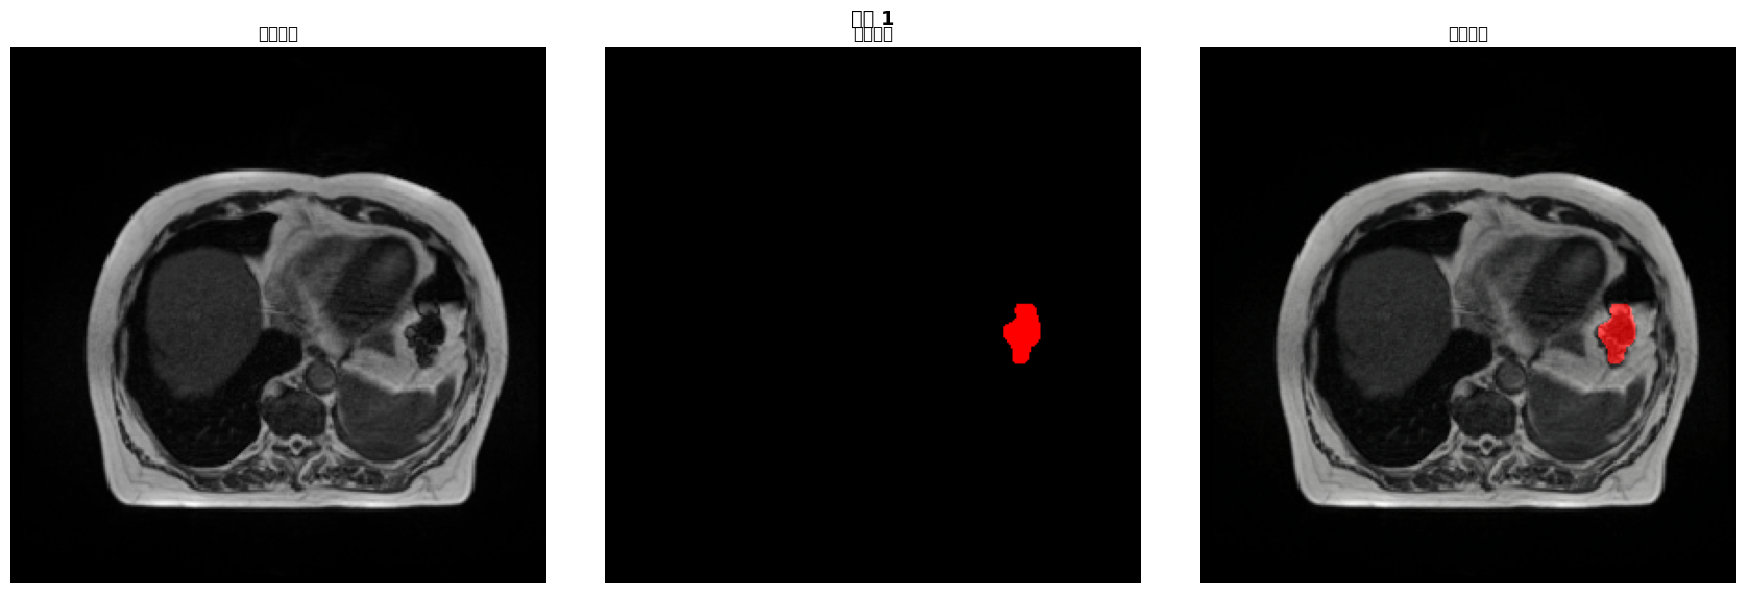

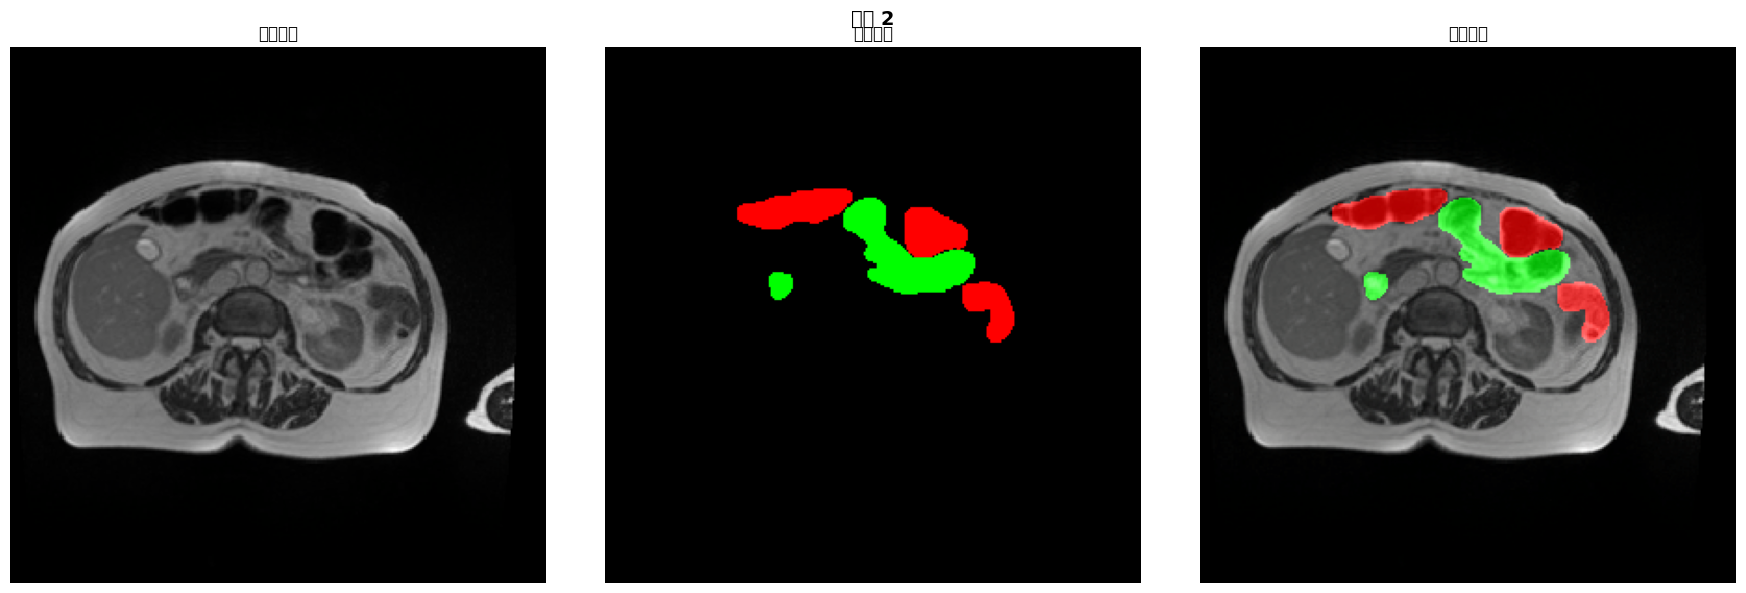

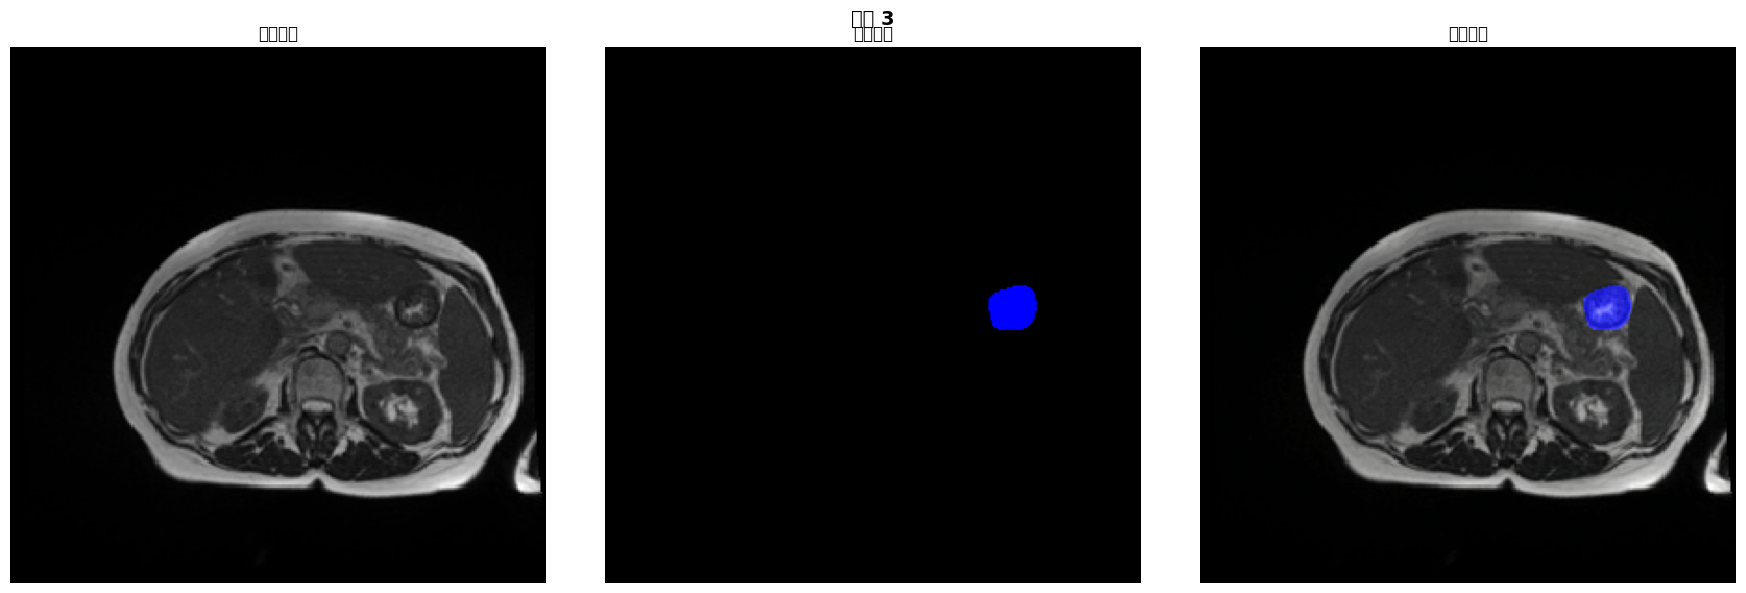


‚úì Êï∞ÊçÆÂèØËßÜÂåñÂÆåÊàêÔºÅ


In [12]:
print("="*70)
print("ÂèØËßÜÂåñÈ™åËØÅÈõÜÊ†∑Êú¨")
print("="*70)

# Ëé∑Âèñ‰∏Ä‰∏™ÊâπÊ¨°ÁöÑÊï∞ÊçÆ
for batch_images, batch_masks in valid_loader:
    # ÂèçÂΩí‰∏ÄÂåñÂõæÂÉè
    batch_images = denormalize(
        batch_images,
        mean=DatasetConfig.MEAN,
        std=DatasetConfig.STD
    )
    
    # ËΩ¨Êç¢‰∏∫numpyÊ†ºÂºè: (B, C, H, W) -> (B, H, W, C)
    batch_images = batch_images.permute(0, 2, 3, 1).numpy()
    batch_masks = batch_masks.numpy()

    print(f"\nÊâπÊ¨°ÂΩ¢Áä∂:")
    print(f"  - ÂõæÂÉè: {batch_images.shape}")
    print(f"  - Êé©Á†Å: {batch_masks.shape}")
    
    # ÊòæÁ§∫Ââç3‰∏™Ê†∑Êú¨
    display_image_and_mask(
        images=batch_images,
        masks=batch_masks,
        max_display=3
    )
    
    break  # Âè™ÊòæÁ§∫Á¨¨‰∏Ä‰∏™ÊâπÊ¨°

print("\n‚úì Êï∞ÊçÆÂèØËßÜÂåñÂÆåÊàêÔºÅ")

## 4 Loading SegFormer From ü§ó HuggingFace

## 4 ‰ªéü§ó HuggingFaceÂä†ËΩΩSegFormer

The SegFormer model was proposed in the paper titled <a href="https://arxiv.org/abs/2105.15203" target="_blank">SegFormer: Simple and Efficient Design for Semantic Segmentation with Transformers.</a> The model consists of a hierarchical a href="learnopencv.com/the-future-of-image-recognition-is-here-pytorch-vision-transformer/" target="_blank">Transformer</a> encoder made of efficient multi-head attention modules and a final lightweight all-MLP decoder head.

Abstract from the paper:

> We present SegFormer, a simple, efficient yet powerful semantic segmentation framework which unifies Transformers with lightweight multilayer perception (MLP) decoders. SegFormer has two appealing features: 1) SegFormer comprises a novel hierarchically structured Transformer encoder which outputs multiscale features. It does not need positional encoding, thereby avoiding the interpolation of positional codes which leads to decreased performance when the testing resolution differs from training. 2) SegFormer avoids complex decoders. The proposed MLP decoder aggregates information from different layers, and thus combining both local attention and global attention to render powerful representations. We show that this simple and lightweight design is the key to efficient segmentation on Transformers. We scale our approach up to obtain a series of models from SegFormer-B0 to SegFormer-B5, reaching significantly better performance and efficiency than previous counterparts. For example, SegFormer-B4 achieves 50.3% mIoU on ADE20K with 64M parameters, being 5x smaller and 2.2% better than the previous best method. Our best model, SegFormer-B5, achieves 84.0% mIoU on Cityscapes validation set and shows excellent zero-shot robustness on Cityscapes-C.

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_Segformer_architecture.png" width="75%" align="center">

Source: Arxiv paper

SegFormerÊ®°ÂûãÂú®È¢ò‰∏∫<a href="https://arxiv.org/abs/2105.15203" target="_blank">SegFormerÔºöÂü∫‰∫éTransformerÁöÑÁÆÄÂçïÈ´òÊïàËØ≠‰πâÂàÜÂâ≤ËÆæËÆ°„ÄÇ</a>ËØ•Ê®°ÂûãÁî±ÂàÜÂ±ÇTransformerÁºñÁ†ÅÂô®ÔºàÈááÁî®È´òÊïàÂ§öÂ§¥Ê≥®ÊÑèÂäõÊ®°ÂùóÔºâ‰∏éÊúÄÁªàËΩªÈáèÁ∫ßÂÖ®MLPËß£Á†ÅÂô®Â§¥ÁªÑÊàê„ÄÇ

ËÆ∫ÊñáÊëòË¶ÅÔºö

> Êàë‰ª¨ÊèêÂá∫ SegFormerÔºå‰∏Ä‰∏™ÁÆÄÂçïÈ´òÊïà‰∏îÂº∫Â§ßÁöÑËØ≠‰πâÂàÜÂâ≤Ê°ÜÊû∂ÔºåÂÆÉÂ∞Ü Transformer ‰∏éËΩªÈáèÁ∫ßÂ§öÂ±ÇÊÑüÁü•Âô®ÔºàMLPÔºâËß£Á†ÅÂô®Áõ∏ÁªìÂêà„ÄÇSegFormer ÂÖ∑Êúâ‰∏§‰∏™Á™ÅÂá∫ÁâπÁÇπÔºö1) ÂÆÉÂåÖÂê´‰∏Ä‰∏™Êñ∞ÂûãÂàÜÂ±ÇÁªìÊûÑÁöÑ Transformer ÁºñÁ†ÅÂô®ÔºåÂèØËæìÂá∫Â§öÂ∞∫Â∫¶ÁâπÂæÅ„ÄÇËØ•ÁºñÁ†ÅÂô®Êó†ÈúÄ‰ΩçÁΩÆÁºñÁ†ÅÔºå‰ªéËÄåÈÅøÂÖç‰∫Ü‰ΩçÁΩÆÁºñÁ†ÅÊèíÂÄºÈóÆÈ¢ò‚Äî‚ÄîÂΩìÊµãËØïÂàÜËæ®Áéá‰∏éËÆ≠ÁªÉÂàÜËæ®Áéá‰∏çÂêåÊó∂ÔºåËØ•ÈóÆÈ¢ò‰ºöÂØºËá¥ÊÄßËÉΩ‰∏ãÈôç„ÄÇ2) ËßÑÈÅøÂ§çÊùÇËß£Á†ÅÂô®ËÆæËÆ°„ÄÇÊèêÂá∫ÁöÑMLPËß£Á†ÅÂô®ÈÄöËøáËÅöÂêàÂ§öÂ±Ç‰ø°ÊÅØÔºåÂêåÊó∂ËûçÂêàÂ±ÄÈÉ®Ê≥®ÊÑèÂäõ‰∏éÂÖ®Â±ÄÊ≥®ÊÑèÂäõÊú∫Âà∂ÔºåÁîüÊàêÂº∫ÂäõË°®ÂæÅ„ÄÇÊàë‰ª¨ËØÅÊòéËøôÁßçËΩªÈáèÂåñËÆæËÆ°ÊòØTransformerÂÆûÁé∞È´òÊïàÂàÜÂâ≤ÁöÑÂÖ≥ÈîÆ„ÄÇÈÄöËøáÊâ©Â±ïÊ®°ÂûãËßÑÊ®°ÔºåÊàë‰ª¨ÊûÑÂª∫‰∫Ü‰ªéSegFormer-B0Âà∞SegFormer-B5ÁöÑÁ≥ªÂàóÊ®°ÂûãÔºåÂú®ÊÄßËÉΩ‰∏éÊïàÁéá‰∏äÊòæËëóË∂ÖË∂äÂâç‰ª£ÊñπÊ°à„ÄÇ‰æãÂ¶ÇÔºåSegFormer-B4Âú®ADE20KÊï∞ÊçÆÈõÜ‰∏ä‰ª•6400‰∏áÂèÇÊï∞ÂÆûÁé∞50.3%ÁöÑmIoUÔºåÊ®°ÂûãËßÑÊ®°Áº©Â∞è5ÂÄçÁöÑÂêåÊó∂ÊÄßËÉΩÊèêÂçá2.2%„ÄÇÊàë‰ª¨ÁöÑÊúÄ‰Ω≥Ê®°ÂûãSegFormer-B5Âú®CityscapesÈ™åËØÅÈõÜ‰∏äËææÂà∞84.0%ÁöÑmIoUÔºåÂπ∂Âú®Cityscapes-CÊï∞ÊçÆÈõÜÂ±ïÁé∞Âá∫ÂçìË∂äÁöÑÈõ∂Ê†∑Êú¨È≤ÅÊ£íÊÄß„ÄÇ

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_Segformer_architecture.png" width="75%" align="center">

Êù•Ê∫êÔºöArxivËÆ∫Êñá

**You can check all the trained weights available for SegFormer model on HuggingFace <a href="https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads&search=nvidia%2Fsegformer" target="_blank">over here.</a>**

**ÊÇ®ÂèØ‰ª•Âú®HuggingFace‰∏äÊü•ÁúãSegFormerÊ®°ÂûãÊâÄÊúâÂèØÁî®ÁöÑËÆ≠ÁªÉÊùÉÈáçÔºåÂÖ∑‰ΩìËØ∑ÁÇπÂáªÊ≠§Â§ÑÔºö<a href="https://huggingface.co/models?pipeline_tag=image-segmentation&sort=downloads&search=nvidia%2Fsegformer" target="_blank">Ê≠§Â§Ñ</a>„ÄÇ**

Loading a pre-trained model version and getting it ready for inference or finetuning is very easy, thanks to HuggingFace. We only have to pass the following:

1. `pretrained_model_name_or_path`: (string). The id/path of a pre-trained model hosted on the Huggingface model zoo.
2. `num_labels`: (int) The number of channels (one for each class) we want the model to give as output. Suppose the number differs from the original number. In that case, the layer will be replaced with a new layer with randomly initialized weights.
3. `ignore_mismatched_sizes`: (bool) Boolean value to whether or not to ignore the weight key mismatch. Here, it occurs because we change the `num_labels` value.

ÂÄüÂä©HuggingFaceÔºåÂä†ËΩΩÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁâàÊú¨Âπ∂‰ΩøÂÖ∂ÂáÜÂ§áÂ∞±Áª™ËøõË°åÊé®ÁêÜÊàñÂæÆË∞ÉÂèòÂæóÈùûÂ∏∏ÁÆÄÂçï„ÄÇÊàë‰ª¨Âè™ÈúÄ‰º†ÈÄí‰ª•‰∏ãÂèÇÊï∞Ôºö

1. `pretrained_model_name_or_path`: (Â≠óÁ¨¶‰∏≤)„ÄÇHuggingfaceÊ®°ÂûãÂä®Áâ©Âõ≠‰∏≠ÊâòÁÆ°ÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑID/Ë∑ØÂæÑ„ÄÇ
2. `num_labels`ÔºöÔºàÊï¥Êï∞ÔºâÊ®°ÂûãËæìÂá∫ÈÄöÈÅìÊï∞ÔºàÊØèÁ±ªÂØπÂ∫î‰∏Ä‰∏™ÈÄöÈÅìÔºâ„ÄÇËã•ËØ•Êï∞ÂÄº‰∏éÂéüÂßãÈÄöÈÅìÊï∞‰∏çÂêåÔºåÂàôËØ•Â±ÇÂ∞ÜË¢´ÊõøÊç¢‰∏∫ÊùÉÈáçÈöèÊú∫ÂàùÂßãÂåñÁöÑÊñ∞Â±Ç„ÄÇ
3. `ignore_mismatched_sizes`ÔºöÔºàÂ∏ÉÂ∞îÂÄºÔºâÁî®‰∫éÊéßÂà∂ÊòØÂê¶ÂøΩÁï•ÊùÉÈáçÈîÆÂêç‰∏çÂåπÈÖçÁöÑÊÉÖÂÜµ„ÄÇÊ≠§Â§ÑÂõ†‰øÆÊîπ`num_labels`ÂÄºËÄåÂºïÂèëËØ•ÈóÆÈ¢ò„ÄÇ

### 4.1 Introduction to SegFormer

SegFormer is an efficient semantic segmentation model proposed by NVIDIA, featuring the following characteristics:
- **Hierarchical Transformer Encoder**: Extracts multi-scale features
- **Lightweight MLP Decoder**: Aggregates multi-scale information
- **No Position Encoding**: Avoids performance degradation from interpolation
- **High Efficiency**: Low computational cost while maintaining high accuracy

**Available SegFormer Models**:
- `segformer-b0`: Minimal model (~4M parameters)
- `segformer-b1`: Small model (~14M parameters)
- `segformer-b2`: Medium model (~28M parameters)
- `segformer-b3`: Large model (~47M parameters)
- `segformer-b4`: Extra-large model (~64M parameters)
- `segformer-b5`: Maximum model (~84M parameters)

### 4.1 SegFormerÁÆÄ‰ªã

SegFormerÊòØNVIDIAÊèêÂá∫ÁöÑÈ´òÊïàËØ≠‰πâÂàÜÂâ≤Ê®°ÂûãÔºåÂÖ∑Êúâ‰ª•‰∏ãÁâπÁÇπÔºö
- **ÂàÜÂ±ÇTransformerÁºñÁ†ÅÂô®**: ÊèêÂèñÂ§öÂ∞∫Â∫¶ÁâπÂæÅ
- **ËΩªÈáèÁ∫ßMLPËß£Á†ÅÂô®**: ËÅöÂêàÂ§öÂ∞∫Â∫¶‰ø°ÊÅØ
- **Êó†ÈúÄ‰ΩçÁΩÆÁºñÁ†Å**: ÈÅøÂÖçÊèíÂÄºÂØºËá¥ÁöÑÊÄßËÉΩ‰∏ãÈôç
- **È´òÊïà**: Âú®‰øùÊåÅÈ´òÁ≤æÂ∫¶ÁöÑÂêåÊó∂ËÆ°ÁÆóÈáèËæÉÂ∞è

**ÂèØÁî®ÁöÑSegFormerÊ®°Âûã**:
- `segformer-b0`: ÊúÄÂ∞èÊ®°Âûã (~4MÂèÇÊï∞)
- `segformer-b1`: Â∞èÂûãÊ®°Âûã (~14MÂèÇÊï∞)
- `segformer-b2`: ‰∏≠ÂûãÊ®°Âûã (~28MÂèÇÊï∞)
- `segformer-b3`: Â§ßÂûãÊ®°Âûã (~47MÂèÇÊï∞)
- `segformer-b4`: Ë∂ÖÂ§ßÂûãÊ®°Âûã (~64MÂèÇÊï∞)
- `segformer-b5`: ÊúÄÂ§ßÊ®°Âûã (~84MÂèÇÊï∞)

In [13]:
def get_model(*, model_name: str, num_classes: int) -> SegformerForSemanticSegmentation:
    """‰ªéHuggingFaceÂä†ËΩΩSegFormerÊ®°Âûã
    
    Args:
        model_name: È¢ÑËÆ≠ÁªÉÊ®°ÂûãÂêçÁß∞ÊàñË∑ØÂæÑ
        num_classes: ËæìÂá∫Á±ªÂà´Êï∞Ôºà‰∏éÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÂèØ‰ª•‰∏çÂêåÔºâ
        
    Returns:
        SegFormerÊ®°ÂûãÂÆû‰æã
    """
    print(f"\nÊ≠£Âú®Âä†ËΩΩÊ®°Âûã: {model_name}")
    print(f"ËæìÂá∫Á±ªÂà´Êï∞: {num_classes}")
    
    model = SegformerForSemanticSegmentation.from_pretrained(
        model_name,
        num_labels=num_classes,
        ignore_mismatched_sizes=True,  # ÂøΩÁï•ÂàÜÁ±ªÂ§¥ÁöÑÂ§ßÂ∞è‰∏çÂåπÈÖç
    )
    
    print("‚úì Ê®°ÂûãÂä†ËΩΩÂÆåÊàêÔºÅ")
    return model


print("‚úì Ê®°ÂûãÂä†ËΩΩÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ")

‚úì Ê®°ÂûãÂä†ËΩΩÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ


### 4.2 Testing Model Loading and Forward Propagation
### 4.2 ÊµãËØïÊ®°ÂûãÂä†ËΩΩÂíåÂâçÂêë‰º†Êí≠

In [14]:
print("="*70)
print("ÊµãËØïÊ®°Âûã")
print("="*70)

# Âä†ËΩΩÊ®°Âûã
model = get_model(
    model_name=TrainingConfig.MODEL_NAME,
    num_classes=DatasetConfig.NUM_CLASSES
)

# ÂàõÂª∫ËôöÊãüËæìÂÖ•
dummy_data = torch.randn(1, 3, *DatasetConfig.IMAGE_SIZE[::-1])  # (B, C, H, W)
dummy_target = torch.randint(0, DatasetConfig.NUM_CLASSES, (*DatasetConfig.IMAGE_SIZE[::-1],)).unsqueeze(0)

print(f"\nËôöÊãüËæìÂÖ•ÂΩ¢Áä∂:")
print(f"  - ÂõæÂÉè: {dummy_data.shape}")
print(f"  - ÁõÆÊ†á: {dummy_target.shape}")

# ÂâçÂêë‰º†Êí≠
with torch.no_grad():
    outputs = model(pixel_values=dummy_data, labels=dummy_target, return_dict=True)

print(f"\nÊ®°ÂûãËæìÂá∫:")
print(f"  - LogitsÂΩ¢Áä∂: {outputs['logits'].shape}")
print(f"  - ÂÜÖÁΩÆÊçüÂ§±: {outputs['loss'].item():.4f}")

# ‰∏äÈááÊ†∑ËæìÂá∫‰ª•ÂåπÈÖçËæìÂÖ•Â§ßÂ∞è
upsampled_logits = F.interpolate(
    outputs["logits"],
    size=dummy_target.shape[-2:],
    mode="bilinear",
    align_corners=False
)

print(f"  - ‰∏äÈááÊ†∑ÂêéÂΩ¢Áä∂: {upsampled_logits.shape}")
print("\nÊ≥®ÊÑè: Ê®°ÂûãËæìÂá∫ÁöÑlogitsÈúÄË¶Å‰∏äÈááÊ†∑Âà∞ËæìÂÖ•ÂõæÂÉèÂ§ßÂ∞èÔºÅ")
print("‚úì Ê®°ÂûãÊµãËØïÂÆåÊàêÔºÅ")

ÊµãËØïÊ®°Âûã

Ê≠£Âú®Âä†ËΩΩÊ®°Âûã: nvidia/segformer-b0-finetuned-ade-512-512
ËæìÂá∫Á±ªÂà´Êï∞: 4


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([4]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([4, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


‚úì Ê®°ÂûãÂä†ËΩΩÂÆåÊàêÔºÅ

ËôöÊãüËæìÂÖ•ÂΩ¢Áä∂:
  - ÂõæÂÉè: torch.Size([1, 3, 288, 288])
  - ÁõÆÊ†á: torch.Size([1, 288, 288])

Ê®°ÂûãËæìÂá∫:
  - LogitsÂΩ¢Áä∂: torch.Size([1, 4, 72, 72])
  - ÂÜÖÁΩÆÊçüÂ§±: 1.3929
  - ‰∏äÈááÊ†∑ÂêéÂΩ¢Áä∂: torch.Size([1, 4, 288, 288])

Ê≥®ÊÑè: Ê®°ÂûãËæìÂá∫ÁöÑlogitsÈúÄË¶Å‰∏äÈááÊ†∑Âà∞ËæìÂÖ•ÂõæÂÉèÂ§ßÂ∞èÔºÅ
‚úì Ê®°ÂûãÊµãËØïÂÆåÊàêÔºÅ


* The model's forward pass takes multiple arguments <a href="https://huggingface.co/docs/transformers/v4.15.0/model_doc/segformer#transformers.SegformerForSemanticSegmentation.forward" target="_blank">[SegFormer Documentation]</a>. The two important ones are `pixel_values` and `labels`.
* The `pixel_values` argument refers to the input images. The `labels` argument is for passing the ground-truth mask.
* The model's forward pass also calculates the cross-entropy loss if `labels` are passed.
* The output logits are smaller than the input image size. To get the **outputs** to match the input image size, we need to simply **upsample** it.

* ËØ•Ê®°ÂûãÁöÑÂâçÂêë‰º†Êí≠ÈúÄË¶ÅÂ§ö‰∏™ÂèÇÊï∞ <a href="https://huggingface.co/docs/transformers/v4.15.0/model_doc/segformer#transformers.SegformerForSemanticSegmentation.forward" target="_blank">[SegFormer ÊñáÊ°£]</a>„ÄÇÂÖ∂‰∏≠‰∏§‰∏™ÈáçË¶ÅÂèÇÊï∞ÊòØ `pixel_values` Âíå `labels`„ÄÇ
* `pixel_values` ÂèÇÊï∞Êåá‰ª£ËæìÂÖ•ÂõæÂÉè„ÄÇ`labels` ÂèÇÊï∞Áî®‰∫é‰º†ÈÄíÁúüÂÆûÊ†áÁ≠æÊé©ËÜú„ÄÇ
* Ëã•‰º†ÈÄí `labels`ÔºåÊ®°ÂûãÂâçÂêë‰º†Êí≠Êó∂Ëøò‰ºöËÆ°ÁÆó‰∫§ÂèâÁÜµÊçüÂ§±„ÄÇ
* ËæìÂá∫ÈÄªËæëÂÄºÂ∞è‰∫éËæìÂÖ•ÂõæÂÉèÂ∞∫ÂØ∏„ÄÇË¶Å‰Ωø**ËæìÂá∫**‰∏éËæìÂÖ•ÂõæÂÉèÂ∞∫ÂØ∏ÂåπÈÖçÔºåÂè™ÈúÄËøõË°å**‰∏äÈááÊ†∑**Âç≥ÂèØ„ÄÇ

### 4.3 Inspecting the Model Structure
### 4.3 Êü•ÁúãÊ®°ÂûãÁªìÊûÑ

In [15]:
# ÊâìÂç∞Ê®°ÂûãÊëòË¶Å
print("\n" + "="*70)
print("Ê®°ÂûãÁªìÊûÑÊëòË¶Å")
print("="*70)

model_summary = summary(
    model,
    input_size=(1, 3, *DatasetConfig.IMAGE_SIZE[::-1]),
    depth=2,
    device="cpu",
    verbose=0
)

print(model_summary)


Ê®°ÂûãÁªìÊûÑÊëòË¶Å
Layer (type:depth-idx)                                                      Output Shape              Param #
SegformerForSemanticSegmentation                                            [1, 4, 72, 72]            --
‚îú‚îÄSegformerModel: 1-1                                                       [1, 32, 72, 72]           --
‚îÇ    ‚îî‚îÄSegformerEncoder: 2-1                                                [1, 32, 72, 72]           3,319,392
‚îú‚îÄSegformerDecodeHead: 1-2                                                  [1, 4, 72, 72]            --
‚îÇ    ‚îî‚îÄModuleList: 2-2                                                      --                        132,096
‚îÇ    ‚îî‚îÄConv2d: 2-3                                                          [1, 256, 72, 72]          262,144
‚îÇ    ‚îî‚îÄBatchNorm2d: 2-4                                                     [1, 256, 72, 72]          512
‚îÇ    ‚îî‚îÄReLU: 2-5                                                            [1,

To access the model's output, we have to use the `["logits"]` key. Similarly, we can access the loss via the `"loss"` key.

Ë¶ÅËÆøÈóÆÊ®°ÂûãÁöÑËæìÂá∫ÔºåÊàë‰ª¨ÈúÄË¶Å‰ΩøÁî® `[‚Äúlogits‚Äù]` ÈîÆ„ÄÇÂêåÊ†∑Âú∞ÔºåÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî® `‚Äúloss‚Äù` ÈîÆËÆøÈóÆÊçüÂ§±ÂÄº„ÄÇ

## 5 Evaluation Metric  & Loss Function
## 5 ËØÑ‰º∞ÊåáÊ†á‰∏éÊçüÂ§±ÂáΩÊï∞

The **Dice Coefficient** (otherwise known as the *F1-Score*) is a function that is commonly used in the context of segmentation and is often specifically used as the basis for a loss function for segmentation problems. We will write the custom loss function next based on the Dice Coefficient, but let's first provide the motivation for why this might be a good idea.

For a binary classification problem, the metric is defined as follows using set notation, where `A` and `B` are segmentation masks representing the ground truth mask and the predicted segmentation map.
<br>

$$
Dice = \frac{2*|A\cap B\hspace{1mm}|}{|A\hspace{1mm}| + |B\hspace{1mm}|} \hspace{2mm}
$$

Simply put, the metric is twice the overlap area divided by the total number of pixels in both images. As you can see, the Dice Coefficient is very similar to IoU. Both metrics range from `0` to `1` and are positively correlated with each other. In terms of confusion matrix components, the metric can also be defined as follows:

<br>
$$Dice =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

However, the Dice Coefficient is not quite as intuitive as IoU. To better understand the formulation, we need to consider two important quantities that lead to its development: Precision and Recall, as defined below.
<br>

$$P:= \frac{TP}{TP + FP}  \hspace{10mm} R:= \frac{TP}{TP + FN}$$


<br>
Precision is a measure of how precise the model is in making predictions (quality or purity of the positive predictions), and Recall considers what we missed or describes the completeness of the positive predictions.
This is the motivation that gave rise to the development of the Dice Coefficient (F1-Score) below, defined as the harmonic mean of the two quantities (a balancing between the two quantities):
<br>

$$Dice = (\frac{2}{\frac{1}{P} + \frac{1}{R}}) \hspace{2mm} =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

Another way to look at each component is by referring to the following figure from Wikipedia for the <a href="https://en.wikipedia.org/wiki/F-score" target="_blank">F1-Score</a>. Here we see that it's important to consider which elements are relevant and which elements are retrieved. In this context, it is easy to see that both Precision and Recall are essential components for quantifying the accuracy of a model.

<img src='https://opencv.org/wp-content/uploads/2022/07/c4-05-precision-recall.png' align='center' width="60%">

---

Note that the Dice Coefficient can also be used as an evaluation metric and is used in the Kaggle competition as an evaluation metric along with 3D Hausdorff distance. But since, for this project, we are focusing on 2D images, we will stick with the Dice coefficient as our primary evaluation metric.

**DiceÁ≥ªÊï∞**Ôºà‰∫¶Áß∞*F1ÂàÜÊï∞*ÔºâÊòØÂàÜÂâ≤È¢ÜÂüüÂ∏∏Áî®ÁöÑÂáΩÊï∞ÔºåÂ∏∏Ë¢´‰∏ìÈó®Áî®‰ΩúÂàÜÂâ≤ÈóÆÈ¢òÁöÑÊçüÂ§±ÂáΩÊï∞Âü∫Á°Ä„ÄÇÊé•‰∏ãÊù•Êàë‰ª¨Â∞ÜÂü∫‰∫éDiceÁ≥ªÊï∞ÁºñÂÜôËá™ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞Ôºå‰ΩÜÈ¶ñÂÖàÈúÄÈòêÊòéÈááÁî®Ê≠§ÊñπÊ≥ïÁöÑÂêàÁêÜÊÄß„ÄÇ

ÂØπ‰∫é‰∫åÂàÜÁ±ªÈóÆÈ¢òÔºåËØ•ÊåáÊ†áÈááÁî®ÈõÜÂêàÁ¨¶Âè∑ÂÆö‰πâÂ¶Ç‰∏ãÔºåÂÖ∂‰∏≠`A`Âíå`B`ÂàÜÂà´Ë°®Á§∫ÁúüÂÆûÊ†áÁ≠æÊé©ËÜú‰∏éÈ¢ÑÊµãÂàÜÂâ≤ÂõæÔºö
<br>

$$
Dice = \frac{2*|A\cap B\hspace{1mm}|}{|A\hspace{1mm}| + |B\hspace{1mm}|} \hspace {2mm}
$$

ÁÆÄË®Ä‰πãÔºåËØ•ÊåáÊ†áÁ≠â‰∫é‰∏§ÂõæÂÉèÈáçÂè†Èù¢ÁßØÁöÑ‰∏§ÂÄçÈô§‰ª•‰∏§ÂõæÂÉèÂÉèÁ¥†ÊÄªÂíå„ÄÇÂèØËßÅDiceÁ≥ªÊï∞‰∏éIoUÊûÅ‰∏∫Áõ∏‰ººÔºö‰∏§ËÄÖÂèñÂÄºËåÉÂõ¥Âùá‰∏∫`0`Ëá≥`1`Ôºå‰∏îÂëàÊ≠£Áõ∏ÂÖ≥ÂÖ≥Á≥ª„ÄÇËã•‰ªéÊ∑∑Ê∑ÜÁü©ÈòµËßíÂ∫¶ÂÆö‰πâÔºåËØ•ÊåáÊ†áÂèØË°®Á§∫‰∏∫Ôºö

<br>
$$Dice =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

ÁÑ∂ËÄåDiceÁ≥ªÊï∞‰∏çÂ¶ÇIoUÁõ¥ËßÇ„ÄÇ‰∏∫ÁêÜËß£ÂÖ∂Êé®ÂØºËøáÁ®ãÔºåÈúÄÂÖ≥Ê≥®‰∏§‰∏™ÂÖ≥ÈîÆÈáèÔºöÁ≤æÁ°ÆÁéá‰∏éÂè¨ÂõûÁéáÔºåÂÆö‰πâÂ¶Ç‰∏ãÔºö
<br>

$$P:= \frac{TP}{TP + FP}  \hspace{10mm} R:= \frac{TP}{TP + FN}$$


<br>
Á≤æÁ°ÆÂ∫¶Ë°°ÈáèÊ®°ÂûãÈ¢ÑÊµãÁöÑÁ≤æÂáÜÁ®ãÂ∫¶ÔºàÂç≥Ê≠£Ê†∑Êú¨È¢ÑÊµãÁöÑË¥®ÈáèÊàñÁ∫ØÂ∫¶ÔºâÔºåËÄåÂè¨ÂõûÂ∫¶ÂÖ≥Ê≥®ÈÅóÊºèÊÉÖÂÜµÊàñÊèèËø∞Ê≠£Ê†∑Êú¨È¢ÑÊµãÁöÑÂÆåÊï¥ÊÄß„ÄÇ
Ê≠£ÊòØÂü∫‰∫éÊ≠§Âä®Êú∫ÔºåÊàë‰ª¨ÊèêÂá∫‰∫Ü‰∏ãÊñáÂ∞ÜÈòêËø∞ÁöÑDiceÁ≥ªÊï∞ÔºàF1ÂàÜÊï∞ÔºâÔºåÂÖ∂ÂÆö‰πâ‰∏∫‰∏§ËÄÖ‰πãÈó¥ÁöÑË∞ÉÂíåÂπ≥ÂùáÂÄºÔºàÂç≥‰∏§ËÄÖ‰πãÈó¥ÁöÑÂπ≥Ë°°ÔºâÔºö
<br>

$$Dice = (\frac{2}{\frac{1}{P} + \frac{1}{R}}) \hspace{2mm} =  \hspace{2mm} \frac{2TP}{2TP + FP + FN}$$
<br>

Âè¶‰∏ÄÁßçÁêÜËß£ÂêÑÁªÑÊàêÈÉ®ÂàÜÁöÑÊñπÂºèÊòØÂèÇËÄÉÁª¥Âü∫ÁôæÁßëÂÖ≥‰∫é<a href="https://en.wikipedia.org/wiki/F-score" target="_blank">F1ÂàÜÊï∞</a>ÁöÑËØ¥ÊòéÂõæ„ÄÇ‰ªé‰∏≠ÂèØËßÅÔºåÂå∫ÂàÜÁõ∏ÂÖ≥ÂÖÉÁ¥†‰∏éÊ£ÄÁ¥¢ÂÖÉÁ¥†Ëá≥ÂÖ≥ÈáçË¶Å„ÄÇÁî±Ê≠§‰∏çÈöæÁúãÂá∫ÔºåÁ≤æÁ°ÆÁéáÂíåÂè¨ÂõûÁéáÈÉΩÊòØÈáèÂåñÊ®°ÂûãÂáÜÁ°ÆÊÄßÁöÑÂÖ≥ÈîÆÊåáÊ†á„ÄÇ

<img src='https://opencv.org/wp-content/uploads/2022/07/c4-05-precision-recall.png' align='center' width="60%">

---

ÈúÄÊ≥®ÊÑèDiceÁ≥ªÊï∞ÂêåÊ†∑ÂèØ‰Ωú‰∏∫ËØÑ‰º∞ÊåáÊ†áÔºåÂú®KaggleÁ´ûËµõ‰∏≠Â∏∏‰∏é3DË±™ÊñØÂ§öÂ§´Ë∑ùÁ¶ªÂπ∂Âàó‰ΩøÁî®„ÄÇ‰ΩÜÈâ¥‰∫éÊú¨È°πÁõÆËÅöÁÑ¶‰∫é‰∫åÁª¥ÂõæÂÉèÔºåÊàë‰ª¨Â∞ÜÂùöÊåÅÈááÁî®DiceÁ≥ªÊï∞‰Ωú‰∏∫‰∏ªË¶ÅËØÑ‰º∞ÊåáÊ†á„ÄÇ

In practice, we found that using a combined loss (Dice loss + CCE loss) works better than Dice loss alone. This is also supported by our experiments:

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_run_f1_compare.png">

The gray one refers to *Dice + CE loss* & the green is for *only Dice loss*

ÂÆûË∑µ‰∏≠Êàë‰ª¨ÂèëÁé∞ÔºåÈááÁî®Â§çÂêàÊçüÂ§±ÂáΩÊï∞ÔºàDiceÊçüÂ§± + CCEÊçüÂ§±ÔºâÁöÑÊïàÊûú‰ºò‰∫éÂçïÁã¨‰ΩøÁî®DiceÊçüÂ§±„ÄÇÂÆûÈ™åÁªìÊûú‰πüÂç∞ËØÅ‰∫ÜËøô‰∏ÄÁªìËÆ∫Ôºö

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_run_f1_compare.png">

ÁÅ∞Ëâ≤Êõ≤Á∫ø‰ª£Ë°®*Dice + CEÊçüÂ§±*ÔºåÁªøËâ≤Êõ≤Á∫ø‰ª£Ë°®*‰ªÖDiceÊçüÂ§±*

In this project, we won‚Äôt be using the CE loss returned by the model for training. Instead, we will define our custom combo loss function that combines the Smooth Dice coefficient & CE to compute the loss.summary(model, input_size=(1, 3, *DatasetConfig.IMAGE_SIZE[::-1]), depth=2, device="cpu")

Âú®Êú¨È°πÁõÆ‰∏≠ÔºåÊàë‰ª¨Â∞Ü‰∏ç‰ΩøÁî®Ê®°ÂûãËøîÂõûÁöÑCEÊçüÂ§±ËøõË°åËÆ≠ÁªÉ„ÄÇÂèñËÄå‰ª£‰πãÁöÑÊòØÔºåÊàë‰ª¨Â∞ÜÂÆö‰πâËá™ÂÆö‰πâÁªÑÂêàÊçüÂ§±ÂáΩÊï∞ÔºåËØ•ÂáΩÊï∞ÁªìÂêàÂπ≥ÊªëDiceÁ≥ªÊï∞‰∏éCEËÆ°ÁÆóÊçüÂ§±ÂÄº„ÄÇsummary(model, input_size=(1, 3, *DatasetConfig.IMAGE_SIZE[::-1]), depth=2, device="cpu")



In [16]:
def dice_coef_loss(
    predictions: torch.Tensor,
    ground_truths: torch.Tensor,
    num_classes: int = 4,
    dims: Tuple[int, int] = (1, 2),
    smooth: float = 1e-8
) -> torch.Tensor:
    """ËÆ°ÁÆóDiceÁ≥ªÊï∞ÊçüÂ§± + ‰∫§ÂèâÁÜµÊçüÂ§±
    
    Args:
        predictions: Ê®°ÂûãÈ¢ÑÊµãlogits, shape: (B, C, H, W)
        ground_truths: ÁúüÂÆûÊ†áÁ≠æ, shape: (B, H, W)
        num_classes: Á±ªÂà´Êï∞Èáè
        dims: ËÆ°ÁÆó‰∫§Âπ∂ÈõÜÁöÑÁª¥Â∫¶
        smooth: Âπ≥ÊªëÈ°πÔºåÈò≤Ê≠¢Èô§Èõ∂
        
    Returns:
        ÁªÑÂêàÊçüÂ§±ÂÄº
    """
    # 1. Â∞ÜÁúüÂÆûÊ†áÁ≠æËΩ¨‰∏∫one-hotÁºñÁ†Å
    ground_truth_oh = F.one_hot(ground_truths, num_classes=num_classes)  # (B, H, W, C)
    
    # 2. ÂØπÈ¢ÑÊµãlogitsÂ∫îÁî®softmaxÂπ∂Ë∞ÉÊï¥Áª¥Â∫¶
    prediction_norm = F.softmax(predictions, dim=1).permute(0, 2, 3, 1)  # (B, H, W, C)

    # 3. ËÆ°ÁÆó‰∫§ÈõÜÂíåÂπ∂ÈõÜ
    intersection = (prediction_norm * ground_truth_oh).sum(dim=dims)
    summation = prediction_norm.sum(dim=dims) + ground_truth_oh.sum(dim=dims)

    # 4. ËÆ°ÁÆóDiceÁ≥ªÊï∞
    dice = (2.0 * intersection + smooth) / (summation + smooth)
    dice_mean = dice.mean()

    # 5. ËÆ°ÁÆó‰∫§ÂèâÁÜµÊçüÂ§±
    ce_loss = F.cross_entropy(predictions, ground_truths)

    # 6. ÁªÑÂêàÊçüÂ§±: Dice Loss + CE Loss
    # Dice Loss = 1 - Dice Score (ËΩ¨Êç¢‰∏∫ÊçüÂ§±)
    combined_loss = (1.0 - dice_mean) + ce_loss
    
    return combined_loss


print("‚úì ÊçüÂ§±ÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ")

# ÊµãËØïÊçüÂ§±ÂáΩÊï∞
print("\nÊµãËØïÊçüÂ§±ÂáΩÊï∞...")
dummy_logits = torch.randn(2, DatasetConfig.NUM_CLASSES, 32, 32)
dummy_labels = torch.randint(0, DatasetConfig.NUM_CLASSES, (2, 32, 32))
test_loss = dice_coef_loss(dummy_logits, dummy_labels, num_classes=DatasetConfig.NUM_CLASSES)
print(f"ÊµãËØïÊçüÂ§±ÂÄº: {test_loss.item():.4f}")
print("‚úì ÊçüÂ§±ÂáΩÊï∞ÊµãËØïÈÄöËøáÔºÅ")

‚úì ÊçüÂ§±ÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ

ÊµãËØïÊçüÂ§±ÂáΩÊï∞...
ÊµãËØïÊçüÂ§±ÂÄº: 2.4910
‚úì ÊçüÂ§±ÂáΩÊï∞ÊµãËØïÈÄöËøáÔºÅ


### 5.2 Evaluation Metric - Dice Coefficient (F1-Score)


To calculate the Dice score for the medical image segmentation task, we will use the `MulticlassF1Score` class from the `torchmetrics` library with the "`macro`" average reduction method.

**Macro** average refers to a method of calculating average performance in multiclass or multilabel classification problems, which treats all classes equally.

### 5.2 ËØÑ‰º∞ÊåáÊ†á - Êà¥ÊñØÁ≥ªÊï∞ÔºàF1ÂàÜÊï∞Ôºâ


‰∏∫ËÆ°ÁÆóÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤‰ªªÂä°ÁöÑÊà¥ÊñØÁ≥ªÊï∞ÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî®`torchmetrics`Â∫ì‰∏≠ÁöÑ`MulticlassF1Score`Á±ªÔºåÂπ∂ÈááÁî®‚Äú`macro`‚ÄùÂπ≥ÂùáÂÄºËÆ°ÁÆóÊñπÊ≥ï„ÄÇ

**ÂÆè**Âπ≥ÂùáÊ≥ïÊòØ‰∏ÄÁßçÂú®Â§öÁ±ªÊàñÂ§öÊ†áÁ≠æÂàÜÁ±ªÈóÆÈ¢ò‰∏≠ËÆ°ÁÆóÂπ≥ÂùáÊÄßËÉΩÁöÑÊñπÊ≥ïÔºåËØ•ÊñπÊ≥ïÂ∞ÜÊâÄÊúâÁ±ªÂà´ËßÜ‰∏∫Âπ≥Á≠â„ÄÇ

In [17]:
# F1-Score (Dice) ÊåáÊ†áÂ∑≤ÁªèÈÄöËøátorchmetrics.MulticlassF1ScoreÂØºÂÖ•
print("‚úì ËØÑ‰º∞ÊåáÊ†á: MulticlassF1Score (DiceÁ≥ªÊï∞)")
print("  - AverageÊñπÂºè: macro (ÊâÄÊúâÁ±ªÂà´Âπ≥Á≠âÂØπÂæÖ)")
print("  - ÈÄÇÁî®Âú∫ÊôØ: Â§öÁ±ªÂà´ËØ≠‰πâÂàÜÂâ≤")

‚úì ËØÑ‰º∞ÊåáÊ†á: MulticlassF1Score (DiceÁ≥ªÊï∞)
  - AverageÊñπÂºè: macro (ÊâÄÊúâÁ±ªÂà´Âπ≥Á≠âÂØπÂæÖ)
  - ÈÄÇÁî®Âú∫ÊôØ: Â§öÁ±ªÂà´ËØ≠‰πâÂàÜÂâ≤


## 6 Creating The Custom LightningModule Class
## 6 ÂàõÂª∫Ëá™ÂÆö‰πâ LightningModule Á±ª

The final custom class we need to create is the `MedicalSegmentationModel` which inherits its functionalities from Lightning‚Äôs `LightningModule` class.

The `LightningModule` class in pytorch-lightning is a higher-level abstraction that simplifies the training and organizing of PyTorch models. It provides a structured, standardized interface for defining and training deep learning models. It separates the concerns of model definition, optimization, and training loop, making the code more modular and readable.


The class methods we need to define are as follows:

1. Model initialization: `__init__(...)` method where the model and its parameters are defined. This method also includes the initialization of the loss and metric calculation methods.
2. Forward pass: `forward(...)` method where the forward pass of the model is defined.
Training step: training_step(...) method where the training step for each batch is defined. It includes calculating loss and metrics, which are logged for tracking.
3. Validation step: `validation_step(...)` method where the validation step for each batch is defined. It also includes the calculation of loss and metrics.
4. Optimizer configuration: `configure_optimizers(...)` method where the optimizer and, optionally, the learning rate scheduler are defined.

Moreover, two methods, `on_train_epoch_end(...)` and `on_validation_epoch_end(...)`, are defined to log the average loss and f1 score after each epoch for training and validation, respectively.

Êàë‰ª¨ÈúÄË¶ÅÂàõÂª∫ÁöÑÊúÄÂêé‰∏Ä‰∏™Ëá™ÂÆö‰πâÁ±ªÊòØ`MedicalSegmentationModel`ÔºåÂÆÉÁªßÊâø‰∫ÜLightningÁöÑ`LightningModule`Á±ªÁöÑÂäüËÉΩ„ÄÇ

pytorch-lightning‰∏≠ÁöÑ`LightningModule`Á±ªÊòØ‰∏Ä‰∏™Êõ¥È´òÂ±ÇÊ¨°ÁöÑÊäΩË±°ÔºåÂÆÉÁÆÄÂåñ‰∫ÜPyTorchÊ®°ÂûãÁöÑËÆ≠ÁªÉÂíåÁªÑÁªáÂ∑•‰Ωú„ÄÇËØ•Á±ª‰∏∫ÂÆö‰πâÂíåËÆ≠ÁªÉÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÊèê‰æõ‰∫ÜÁªìÊûÑÂåñ„ÄÅÊ†áÂáÜÂåñÁöÑÊé•Âè£„ÄÇÂÆÉÂ∞ÜÊ®°ÂûãÂÆö‰πâ„ÄÅ‰ºòÂåñÂíåËÆ≠ÁªÉÂæ™ÁéØÁöÑÂÖ≥Ê≥®ÁÇπÂàÜÁ¶ªÔºå‰Ωø‰ª£Á†ÅÊõ¥ÂÖ∑Ê®°ÂùóÂåñ‰∏îÊòì‰∫éÈòÖËØª„ÄÇ


Êàë‰ª¨ÈúÄË¶ÅÂÆö‰πâÁöÑÁ±ªÊñπÊ≥ïÂ¶Ç‰∏ãÔºö

1. Ê®°ÂûãÂàùÂßãÂåñÔºö`__init__(...)`ÊñπÊ≥ïÁî®‰∫éÂÆö‰πâÊ®°ÂûãÂèäÂÖ∂ÂèÇÊï∞„ÄÇËØ•ÊñπÊ≥ïËøòÂåÖÂê´ÊçüÂ§±ÂáΩÊï∞ÂíåÊåáÊ†áËÆ°ÁÆóÊñπÊ≥ïÁöÑÂàùÂßãÂåñ„ÄÇ
2. ÂâçÂêë‰º†Êí≠Ôºö`forward(...)`ÊñπÊ≥ïÔºåÁî®‰∫éÂÆö‰πâÊ®°ÂûãÂâçÂêë‰º†Êí≠ÊµÅÁ®ã„ÄÇ
ËÆ≠ÁªÉÊ≠•È™§Ôºö`training_step(...)`ÊñπÊ≥ïÔºåÁî®‰∫éÂÆö‰πâÊØèÊâπÊ¨°ÁöÑËÆ≠ÁªÉÊ≠•È™§„ÄÇÂåÖÂê´ÊçüÂ§±‰∏éÊåáÊ†áËÆ°ÁÆóÔºåÂπ∂ËÆ∞ÂΩïÊó•Âøó‰ª•‰æøËøΩË∏™„ÄÇ
3. È™åËØÅÊ≠•È™§Ôºö`validation_step(...)`ÊñπÊ≥ïÔºåÁî®‰∫éÂÆö‰πâÊØèÊâπÊ¨°ÁöÑÈ™åËØÅÊ≠•È™§„ÄÇÂêåÊ†∑ÂåÖÂê´ÊçüÂ§±‰∏éÊåáÊ†áËÆ°ÁÆó„ÄÇ
4. ‰ºòÂåñÂô®ÈÖçÁΩÆÔºö`configure_optimizers(...)`ÊñπÊ≥ïÁî®‰∫éÂÆö‰πâ‰ºòÂåñÂô®ÔºåÂπ∂ÂèØÈÄâÈÖçÁΩÆÂ≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®„ÄÇ

Ê≠§Â§ñÔºåÂÆö‰πâ‰∫Ü‰∏§‰∏™ÊñπÊ≥ïÔºö`on_train_epoch_end(...)`Âíå`on_validation_epoch_end(...)`ÔºåÂàÜÂà´Áî®‰∫éÂú®ÊØè‰∏™ËÆ≠ÁªÉÂíåÈ™åËØÅ epoch ÁªìÊùüÂêéËÆ∞ÂΩïÂπ≥ÂùáÊçüÂ§±ÂÄº‰∏éF1ÂàÜÊï∞„ÄÇ

In [18]:
class MedicalSegmentationModel(pl.LightningModule):
    """ÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤LightningÊ®°Âùó
    
    ÂäüËÉΩ:
    1. Â∞ÅË£ÖSegFormerÊ®°Âûã
    2. ÂÆö‰πâËÆ≠ÁªÉÂíåÈ™åËØÅÊ≠•È™§
    3. ÈÖçÁΩÆ‰ºòÂåñÂô®ÂíåÂ≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
    4. ËÆ°ÁÆóÂíåËÆ∞ÂΩïÊåáÊ†á
    """
    
    def __init__(
        self,
        model_name: str,
        num_classes: int = 4,
        init_lr: float = 0.001,
        optimizer_name: str = "AdamW",
        weight_decay: float = 1e-4,
        use_scheduler: bool = False,
        scheduler_name: str = "MultiStepLR",
        num_epochs: int = 100,
    ):
        super().__init__()

        # ‰øùÂ≠òË∂ÖÂèÇÊï∞
        self.save_hyperparameters()

        # Âä†ËΩΩÊ®°Âûã
        # Ê≥®ÊÑèÔºöLightning‰ºöËá™Âä®ÁÆ°ÁêÜËÆæÂ§áÔºå‰∏çÈúÄË¶ÅÊâãÂä®.to(device)
        segformer_model = get_model(model_name=model_name, num_classes=num_classes)
        
        # ‰ΩøÁî®nn.ModuleÁöÑÊñπÂºèÊ≥®ÂÜåÂ≠êÊ®°ÂùóÔºåÁ°Æ‰øùLightningÊ≠£Á°ÆÁÆ°ÁêÜ
        # ËøôÊ†∑ÂèØ‰ª•Á°Æ‰øùcheckpointÂä†ËΩΩÂíåËÆæÂ§áËΩ¨ÁßªÈÉΩËÉΩÊ≠£Â∏∏Â∑•‰Ωú
        self.model = segformer_model

        # ÂàùÂßãÂåñÊåáÊ†á
        self.mean_train_loss = MeanMetric()
        self.mean_train_f1 = MulticlassF1Score(
            num_classes=num_classes,
            average="macro"
        )
        self.mean_valid_loss = MeanMetric()
        self.mean_valid_f1 = MulticlassF1Score(
            num_classes=num_classes,
            average="macro"
        )

    def forward(self, data: torch.Tensor) -> torch.Tensor:
        """ÂâçÂêë‰º†Êí≠
        
        Args:
            data: ËæìÂÖ•ÂõæÂÉè shape: (B, 3, H, W)
            
        Returns:
            ‰∏äÈááÊ†∑ÂêéÁöÑlogits shape: (B, num_classes, H, W)
        """
        outputs = self.model(pixel_values=data, return_dict=True)
        
        # ‰∏äÈááÊ†∑Âà∞ËæìÂÖ•Â§ßÂ∞è
        upsampled_logits = F.interpolate(
            outputs["logits"],
            size=data.shape[-2:],
            mode="bilinear",
            align_corners=False
        )
        
        return upsampled_logits

    def training_step(self, batch, batch_idx):
        """ËÆ≠ÁªÉÊ≠•È™§"""
        data, target = batch
        logits = self(data)

        # ËÆ°ÁÆóÊçüÂ§±
        loss = dice_coef_loss(
            logits,
            target,
            num_classes=self.hparams.num_classes
        )

        # Êõ¥Êñ∞ÊåáÊ†á
        self.mean_train_loss(loss, weight=data.shape[0])
        self.mean_train_f1(logits.detach(), target)

        # ËÆ∞ÂΩïÊâπÊ¨°ÊåáÊ†áÔºàËøõÂ∫¶Êù°Ôºâ
        self.log("train/batch_loss", self.mean_train_loss, prog_bar=True, logger=False)
        self.log("train/batch_f1", self.mean_train_f1, prog_bar=True, logger=False)
        
        return loss

    def on_train_epoch_end(self):
        """ËÆ≠ÁªÉepochÁªìÊùüÊó∂ÁöÑÊìç‰Ωú"""
        # ËÆ∞ÂΩïepochÊåáÊ†á
        self.log("train/loss", self.mean_train_loss, prog_bar=True)
        self.log("train/f1", self.mean_train_f1, prog_bar=True)
        self.log("epoch", self.current_epoch)

    def validation_step(self, batch, batch_idx):
        """È™åËØÅÊ≠•È™§"""
        data, target = batch
        logits = self(data)

        # ËÆ°ÁÆóÊçüÂ§±
        loss = dice_coef_loss(
            logits,
            target,
            num_classes=self.hparams.num_classes
        )

        # Êõ¥Êñ∞ÊåáÊ†á
        self.mean_valid_loss.update(loss, weight=data.shape[0])
        self.mean_valid_f1.update(logits, target)

    def on_validation_epoch_end(self):
        """È™åËØÅepochÁªìÊùüÊó∂ÁöÑÊìç‰Ωú"""
        # ËÆ∞ÂΩïepochÊåáÊ†á
        self.log("valid/loss", self.mean_valid_loss, prog_bar=True)
        self.log("valid/f1", self.mean_valid_f1, prog_bar=True)
        self.log("epoch", self.current_epoch)

    def configure_optimizers(self):
        """ÈÖçÁΩÆ‰ºòÂåñÂô®ÂíåÂ≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®"""
        # ÂàõÂª∫‰ºòÂåñÂô®
        if self.hparams.optimizer_name in ("AdamW", "Adam"):
            optimizer = getattr(torch.optim, self.hparams.optimizer_name)(
                self.model.parameters(),
                lr=self.hparams.init_lr,
                weight_decay=self.hparams.weight_decay,
                amsgrad=True
            )
        else:
            optimizer = optim.SGD(
                self.model.parameters(),
                lr=self.hparams.init_lr,
                weight_decay=self.hparams.weight_decay
            )

        # Â¶ÇÊûú‰ΩøÁî®Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
        if self.hparams.use_scheduler:
            lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(
                optimizer,
                milestones=[self.hparams.num_epochs // 2],
                gamma=0.1
            )

            lr_scheduler_config = {
                "scheduler": lr_scheduler,
                "interval": "epoch",
                "name": "multi_step_lr"
            }
            
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler_config}
        
        return optimizer


print("‚úì MedicalSegmentationModelÁ±ªÂÆö‰πâÂÆåÊàêÔºÅ")

‚úì MedicalSegmentationModelÁ±ªÂÆö‰πâÂÆåÊàêÔºÅ


## 7 Start Training
## 7 ÂºÄÂßãËÆ≠ÁªÉ

Once we have organized the `LightningModule` and `LightningDataModule` classes, we can utilize Lightning's `Trainer` class to automate the remaining tasks effortlessly.

The `Trainer` offers a range of valuable deep-learning training functionalities, such as mixed-precision training, distributed training, deterministic training, profiling, gradient accumulation, batch overfitting, and more. Implementing these functionalities correctly can be time-consuming, but it becomes a swift process with the `Trainer` class.

By initializing our `MedicalSegmentationModel` and `MedicalSegmentationDataModule` classes and passing them to the `.fit(...)` method of the `Trainer` class instance, we can promptly commence training. This streamlined approach eliminates the need to implement various training aspects manually, providing convenience and efficiency.

Âú®Êï¥ÁêÜÂ•Ω`LightningModule`Âíå`LightningDataModule`Á±ª‰πãÂêéÔºåÊàë‰ª¨‰æøËÉΩÂÄüÂä©LightningÁöÑ`Trainer`Á±ªËΩªÊùæËá™Âä®ÂåñÂÆåÊàêÂâ©‰Ωô‰ªªÂä°„ÄÇ

`Trainer`Êèê‰æõ‰∫ÜÂ§öÁßçÊúâ‰ª∑ÂÄºÁöÑÊ∑±Â∫¶Â≠¶‰π†ËÆ≠ÁªÉÂäüËÉΩÔºå‰æãÂ¶ÇÊ∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ„ÄÅÂàÜÂ∏ÉÂºèËÆ≠ÁªÉ„ÄÅÁ°ÆÂÆöÊÄßËÆ≠ÁªÉ„ÄÅÊÄßËÉΩÂàÜÊûê„ÄÅÊ¢ØÂ∫¶Á¥ØÂä†„ÄÅÊâπÈáèËøáÊãüÂêàÁ≠â„ÄÇÊ≠£Á°ÆÂÆûÁé∞Ëøô‰∫õÂäüËÉΩÈÄöÂ∏∏ËÄóÊó∂Ë¥πÂäõÔºå‰ΩÜÂÄüÂä©`Trainer`Á±ªÂèØÂ§ßÂπÖÊèêÂçáÊïàÁéá„ÄÇ

ÈÄöËøáÂàùÂßãÂåñ`MedicalSegmentationModel`Âíå`MedicalSegmentationDataModule`Á±ªÔºåÂπ∂Â∞ÜÂÆÉ‰ª¨‰º†ÈÄíÁªô`Trainer`Á±ªÂÆû‰æãÁöÑ`.fit(...)`ÊñπÊ≥ïÔºåÂç≥ÂèØÂø´ÈÄüÂêØÂä®ËÆ≠ÁªÉÊµÅÁ®ã„ÄÇËøôÁßçÁ≤æÁÆÄÊñπÊ°àÁúÅÂéª‰∫ÜÊâãÂä®ÂÆûÁé∞ÂêÑÁ±ªËÆ≠ÁªÉÁéØËäÇÁöÑÁπÅÁêêÊìç‰ΩúÔºåÊòæËëóÊèêÂçá‰∫ÜÂºÄÂèë‰æøÂà©ÊÄß‰∏éÊïàÁéá„ÄÇ

### 7.1 Initializing the Model and Data Modules
### 7.1 ÂàùÂßãÂåñÊ®°ÂûãÂíåÊï∞ÊçÆÊ®°Âùó

In [19]:
print("="*70)
print("ÂàùÂßãÂåñËÆ≠ÁªÉ")
print("="*70)

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê‰ª•‰øùËØÅÂèØÈáçÂ§çÊÄß
pl.seed_everything(42, workers=True)

# ÂàùÂßãÂåñÊ®°Âûã
model = MedicalSegmentationModel(
    model_name=TrainingConfig.MODEL_NAME,
    num_classes=DatasetConfig.NUM_CLASSES,
    init_lr=TrainingConfig.INIT_LR,
    optimizer_name=TrainingConfig.OPTIMIZER_NAME,
    weight_decay=TrainingConfig.WEIGHT_DECAY,
    use_scheduler=TrainingConfig.USE_SCHEDULER,
    scheduler_name=TrainingConfig.SCHEDULER,
    num_epochs=TrainingConfig.NUM_EPOCHS,
)

# ÂàùÂßãÂåñÊï∞ÊçÆÊ®°Âùó
data_module = MedicalSegmentationDataModule(
    num_classes=DatasetConfig.NUM_CLASSES,
    img_size=DatasetConfig.IMAGE_SIZE,
    ds_mean=DatasetConfig.MEAN,
    ds_std=DatasetConfig.STD,
    batch_size=TrainingConfig.BATCH_SIZE,
    num_workers=TrainingConfig.NUM_WORKERS,
    pin_memory=torch.cuda.is_available(),
)

print("\n‚úì Ê®°ÂûãÂíåÊï∞ÊçÆÊ®°ÂùóÂàùÂßãÂåñÂÆåÊàêÔºÅ")

ÂàùÂßãÂåñËÆ≠ÁªÉ


Seed set to 42



Ê≠£Âú®Âä†ËΩΩÊ®°Âûã: nvidia/segformer-b0-finetuned-ade-512-512
ËæìÂá∫Á±ªÂà´Êï∞: 4


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([4]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([4, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


‚úì Ê®°ÂûãÂä†ËΩΩÂÆåÊàêÔºÅ

‚úì Ê®°ÂûãÂíåÊï∞ÊçÆÊ®°ÂùóÂàùÂßãÂåñÂÆåÊàêÔºÅ


### 7.2 Configuring Callback Functions
Next, we will define a `ModelCheckpoint` and a `LearningRateMonitor` callback for saving the best model during training and the current learning rate of an epoch.

### 7.2 ÈÖçÁΩÆÂõûË∞ÉÂáΩÊï∞
Êé•‰∏ãÊù•ÔºåÊàë‰ª¨Â∞ÜÂÆö‰πâ‰∏Ä‰∏™`ModelCheckpoint`Âíå‰∏Ä‰∏™`LearningRateMonitor`ÂõûË∞ÉÂáΩÊï∞ÔºåÁî®‰∫éÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã‰ª•ÂèäÊØè‰∏™ epoch ÁöÑÂΩìÂâçÂ≠¶‰π†Áéá„ÄÇ

In [20]:
# Ê®°ÂûãÊ£ÄÊü•ÁÇπÂõûË∞ÉÔºà‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÔºâ
model_checkpoint = ModelCheckpoint(
    monitor="valid/f1",  # ÁõëÊéßÈ™åËØÅÈõÜF1ÂàÜÊï∞
    mode="max",  # F1Ë∂äÂ§ßË∂äÂ•Ω
    filename="ckpt_{epoch:03d}-vloss_{valid/loss:.4f}_vf1_{valid/f1:.4f}",
    auto_insert_metric_name=False,
    save_top_k=1,  # Âè™‰øùÂ≠òÊúÄÂ•ΩÁöÑÊ®°Âûã
    verbose=True,
)

# Â≠¶‰π†ÁéáÁõëÊéßÂõûË∞É
lr_rate_monitor = LearningRateMonitor(logging_interval="epoch")

print("‚úì ÂõûË∞ÉÂáΩÊï∞ÈÖçÁΩÆÂÆåÊàêÔºÅ")
print(f"  - Ê®°ÂûãÊ£ÄÊü•ÁÇπ: ÁõëÊéß valid/f1 (ÊúÄÂ§ßÂåñ)")
print(f"  - Â≠¶‰π†ÁéáÁõëÊéß: ÊØè‰∏™epochËÆ∞ÂΩï")

‚úì ÂõûË∞ÉÂáΩÊï∞ÈÖçÁΩÆÂÆåÊàêÔºÅ
  - Ê®°ÂûãÊ£ÄÊü•ÁÇπ: ÁõëÊéß valid/f1 (ÊúÄÂ§ßÂåñ)
  - Â≠¶‰π†ÁéáÁõëÊéß: ÊØè‰∏™epochËÆ∞ÂΩï


### 7.3 Configuring the Logger (Optional)
We will also initialize the `WandbLogger` to upload the training metrics to your wandb project.During the logger initialization, we set two parameters:
1. `log_model=True` - Upload the model as an artifact when the training is completed.
2. `project` - The project name to use on WandB. A project typically contains logs from multiple experiments and their checkpoints.

When the logger is initialized, it will also print the link for the current experiment, which you open on any device to monitor the training process and also share with your team.

### 7.3 ÈÖçÁΩÆÊó•ÂøóËÆ∞ÂΩïÂô®ÔºàÂèØÈÄâÔºâ
Êàë‰ª¨ËøòÂ∞ÜÂàùÂßãÂåñ `WandbLogger`Ôºå‰ª•‰æøÂ∞ÜËÆ≠ÁªÉÊåáÊ†á‰∏ä‰º†Ëá≥ÊÇ®ÁöÑ WandB È°πÁõÆ„ÄÇ
Âú®Êó•ÂøóÂô®ÂàùÂßãÂåñËøáÁ®ã‰∏≠ÔºåÊàë‰ª¨ËÆæÁΩÆ‰∫Ü‰∏§‰∏™ÂèÇÊï∞Ôºö
1. `log_model=True` - ËÆ≠ÁªÉÂÆåÊàêÂêéÂ∞ÜÊ®°Âûã‰Ωú‰∏∫Â∑•‰ª∂‰∏ä‰º†„ÄÇ
2. `project` - WandB ‰∏ä‰ΩøÁî®ÁöÑÈ°πÁõÆÂêçÁß∞„ÄÇ‰∏Ä‰∏™È°πÁõÆÈÄöÂ∏∏ÂåÖÂê´Â§ö‰∏™ÂÆûÈ™åÁöÑÊó•ÂøóÂèäÂÖ∂Ê£ÄÊü•ÁÇπ„ÄÇ

ÂàùÂßãÂåñËÆ∞ÂΩïÂô®Êó∂ÔºåÂÆÉËøò‰ºöÊâìÂç∞ÂΩìÂâçÂÆûÈ™åÁöÑÈìæÊé•ÔºåÊÇ®ÂèØÂú®‰ªª‰ΩïËÆæÂ§á‰∏äÊâìÂºÄËØ•ÈìæÊé•‰ª•ÁõëÊéßËÆ≠ÁªÉËøáÁ®ãÔºåÂπ∂ÂèØ‰∏éÂõ¢ÈòüÂÖ±‰∫´„ÄÇ

In [21]:
# ÈÖçÁΩÆÊó•ÂøóËÆ∞ÂΩïÂô®
if USE_WANDB:
    import wandb
    wandb_logger = WandbLogger(
        log_model=True,
        project="UWM_Medical_Segmentation",
        name=f"segformer_b4_ep{TrainingConfig.NUM_EPOCHS}"
    )
    print("‚úì WandBÊó•ÂøóËÆ∞ÂΩïÂô®Â∑≤ÂêØÁî®")
    logger = wandb_logger
else:
    logger = True  # ‰ΩøÁî®ÈªòËÆ§ÁöÑTensorBoard logger
    print("‚ÑπÔ∏è ‰ΩøÁî®ÈªòËÆ§TensorBoardÊó•ÂøóËÆ∞ÂΩïÂô®")

‚úì WandBÊó•ÂøóËÆ∞ÂΩïÂô®Â∑≤ÂêØÁî®


### 7.4 Start Training

**Note**:
- Training may take a significant amount of time depending on GPU performance
- It is recommended to test with a small number of epochs first (e.g., 10 epochs)
- If GPU memory is insufficient, reduce BATCH_SIZE

### 7.4 ÂºÄÂßãËÆ≠ÁªÉ

**Ê≥®ÊÑè**:
- ËÆ≠ÁªÉÂèØËÉΩÈúÄË¶ÅËæÉÈïøÊó∂Èó¥ÔºåÂèñÂÜ≥‰∫éGPUÊÄßËÉΩ
- Âª∫ËÆÆÂÖàÁî®Â∞ëÈáèepochÊµãËØïÔºàÂ¶Ç10‰∏™epochÔºâ
- Â¶ÇÊûúÊòæÂ≠ò‰∏çË∂≥ÔºåËØ∑ÂáèÂ∞èBATCH_SIZE

In [23]:
# Âø´ÈÄüËÆ≠ÁªÉÊµãËØïÔºàÂèØÈÄâÔºâ
QUICK_TEST = True  # ËÆæÁΩÆ‰∏∫FalseËøõË°åÂÆåÊï¥ËÆ≠ÁªÉ
TEST_EPOCHS = 2    # Âø´ÈÄüÊµãËØïÁöÑepochÊï∞

if QUICK_TEST:
    print("\n‚ö†Ô∏è Âø´ÈÄüÊµãËØïÊ®°ÂºèÂêØÁî®Ôºà‰ªÖËÆ≠ÁªÉ{}‰∏™epochÔºâ".format(TEST_EPOCHS))
    print("Ë¶ÅËøõË°åÂÆåÊï¥ËÆ≠ÁªÉÔºåËØ∑ËÆæÁΩÆ QUICK_TEST = False\n")
    max_epochs = TEST_EPOCHS
else:
    max_epochs = TrainingConfig.NUM_EPOCHS

# ÂàùÂßãÂåñTrainer
trainer = pl.Trainer(
    accelerator="auto",  # Ëá™Âä®ÈÄâÊã©Âä†ÈÄüÂô®ÔºàGPU/CPUÔºâ
    devices="auto",  # Ëá™Âä®ÈÄâÊã©ÂèØÁî®ËÆæÂ§á
    strategy="auto",  # Ëá™Âä®ÈÄâÊã©ÂàÜÂ∏ÉÂºèÁ≠ñÁï•
    max_epochs=max_epochs,
    enable_model_summary=False,  # Êàë‰ª¨Â∑≤ÁªèÁî®torchinfoÊòæÁ§∫‰∫Ü
    callbacks=[model_checkpoint, lr_rate_monitor],
    precision="16-mixed" if torch.cuda.is_available() else 32,  # Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉÔºà‰ªÖGPUÔºâ
    accumulate_grad_batches=2,  # ÊúâÊïàÊâπÊ¨°Â§ßÂ∞è = 6*2 = 12
    logger=logger,
    log_every_n_steps=10,  # ÊØè10Ê≠•ËÆ∞ÂΩï‰∏ÄÊ¨°
)

print("="*70)
print("ÂºÄÂßãËÆ≠ÁªÉ")
print("="*70)
print(f"ÊúÄÂ§ßepochÊï∞: {max_epochs}")
print(f"ÊâπÊ¨°Â§ßÂ∞è: {TrainingConfig.BATCH_SIZE}")
print(f"ÂàùÂßãÂ≠¶‰π†Áéá: {TrainingConfig.INIT_LR}")
print(f"ËÆæÂ§á: {trainer.accelerator.__class__.__name__}")
print(f"Á≤æÂ∫¶: {trainer.precision}")
print("="*70)

# ÂºÄÂßãËÆ≠ÁªÉ

# Ê∏ÖÁêÜGPUÁºìÂ≠òÔºåÈáäÊîæÊú™‰ΩøÁî®ÁöÑÂÜÖÂ≠ò
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
    allocated = torch.cuda.memory_allocated() / 1024**3
    print(f"‚úì GPUÁºìÂ≠òÂ∑≤Ê∏ÖÁêÜ")
    print(f"  ÂΩìÂâçGPUÂÜÖÂ≠òÂç†Áî®: {allocated:.2f}GB")
    print(f"  GPUËÆæÂ§á: {torch.cuda.get_device_name(0)}")
print()

trainer.fit(model, data_module)

print("\n" + "="*70)
print("ËÆ≠ÁªÉÂÆåÊàêÔºÅ")
print("="*70)
print(f"ÊúÄ‰Ω≥Ê®°Âûã‰øùÂ≠òË∑ØÂæÑ: {model_checkpoint.best_model_path}")
print(f"ÊúÄ‰Ω≥È™åËØÅF1ÂàÜÊï∞: {model_checkpoint.best_model_score:.4f}")



‚ö†Ô∏è Âø´ÈÄüÊµãËØïÊ®°ÂºèÂêØÁî®Ôºà‰ªÖËÆ≠ÁªÉ2‰∏™epochÔºâ
Ë¶ÅËøõË°åÂÆåÊï¥ËÆ≠ÁªÉÔºåËØ∑ËÆæÁΩÆ QUICK_TEST = False



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


ÂºÄÂßãËÆ≠ÁªÉ
ÊúÄÂ§ßepochÊï∞: 2
ÊâπÊ¨°Â§ßÂ∞è: 6
ÂàùÂßãÂ≠¶‰π†Áéá: 0.0003
ËÆæÂ§á: CUDAAccelerator
Á≤æÂ∫¶: 16-mixed
‚úì GPUÁºìÂ≠òÂ∑≤Ê∏ÖÁêÜ
  ÂΩìÂâçGPUÂÜÖÂ≠òÂç†Áî®: 0.08GB
  GPUËÆæÂ§á: NVIDIA GeForce RTX 4060 Laptop GPU

‚úì Êï∞ÊçÆÈõÜÂ∑≤Â≠òÂú®: E:\VSCode_Project\Segformer_medical_lightning\dataset_UWM_GI_Tract_train_valid

Êï∞ÊçÆÈõÜÁªüËÆ°:
  - ËÆ≠ÁªÉÈõÜ: 13238 Âº†ÂõæÂÉè
  - È™åËØÅÈõÜ: 3352 Âº†ÂõæÂÉè


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 1103: 'valid/f1' reached 0.84246 (best 0.84246), saving model to '.\\UWM_Medical_Segmentation\\yzsj0txx\\checkpoints\\ckpt_000-vloss_0.4289_vf1_0.8425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 2206: 'valid/f1' reached 0.85364 (best 0.85364), saving model to '.\\UWM_Medical_Segmentation\\yzsj0txx\\checkpoints\\ckpt_001-vloss_0.4165_vf1_0.8536.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=2` reached.



ËÆ≠ÁªÉÂÆåÊàêÔºÅ
ÊúÄ‰Ω≥Ê®°Âûã‰øùÂ≠òË∑ØÂæÑ: .\UWM_Medical_Segmentation\yzsj0txx\checkpoints\ckpt_001-vloss_0.4165_vf1_0.8536.ckpt
ÊúÄ‰Ω≥È™åËØÅF1ÂàÜÊï∞: 0.8536


## 8 Inference on the Medical Segmentation Dataset
## 8 Âü∫‰∫éÂåªÂ≠¶ÂàÜÂâ≤Êï∞ÊçÆÈõÜÁöÑÊé®ÁêÜ

For inference, we will use the same validation data as we did during training. We will plot the ground truth images, the ground truth masks, and the predicted segmentation maps overlayed on the ground truth images.

Âú®Êé®ÁêÜÈò∂ÊÆµÔºåÊàë‰ª¨Â∞Ü‰ΩøÁî®‰∏éËÆ≠ÁªÉÈò∂ÊÆµÁõ∏ÂêåÁöÑÈ™åËØÅÊï∞ÊçÆ„ÄÇÊàë‰ª¨Â∞ÜÁªòÂà∂ÁúüÂÆûÂõæÂÉè„ÄÅÁúüÂÆûÊé©ËÜúÔºåÂπ∂Â∞ÜÈ¢ÑÊµãÁöÑÂàÜÂâ≤ÂõæÂè†Âä†Âú®ÁúüÂÆûÂõæÂÉè‰∏äËøõË°åÂ±ïÁ§∫„ÄÇ

### 8.1 Load The Best Trained Model
### 8.1 Âä†ËΩΩÊúÄ‰Ω≥ËÆ≠ÁªÉÊ®°Âûã

Initialize the model with trained weights.

‰ΩøÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊùÉÈáçÂàùÂßãÂåñÊ®°Âûã„ÄÇ

In [24]:
print("="*70)
print("Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã")
print("="*70)

# Ëé∑ÂèñÊúÄ‰Ω≥Ê®°ÂûãË∑ØÂæÑ
CKPT_PATH = model_checkpoint.best_model_path
print(f"Ê®°ÂûãË∑ØÂæÑ: {CKPT_PATH}")

# ËÆæÁΩÆËÆæÂ§á
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"ÁõÆÊ†áËÆæÂ§á: {DEVICE}")

# Âä†ËΩΩÊ®°ÂûãÔºå‰ΩøÁî®map_locationÁ°Æ‰øùÊ≠£Á°ÆÂä†ËΩΩ
print("Ê≠£Âú®Âä†ËΩΩcheckpoint...")
model = MedicalSegmentationModel.load_from_checkpoint(
    CKPT_PATH,
    map_location=DEVICE
)

# ÊòéÁ°ÆÁßªÂä®Êï¥‰∏™Ê®°ÂûãÂà∞ÁõÆÊ†áËÆæÂ§á
print("ÁßªÂä®Ê®°ÂûãÂà∞ÁõÆÊ†áËÆæÂ§á...")
model = model.to(DEVICE)

# Âº∫Âà∂ÁßªÂä®ÂÜÖÈÉ®SegFormerÊ®°Âûã
if hasattr(model, 'model'):
    model.model = model.model.to(DEVICE)
    print(f"‚úì ÂÜÖÈÉ®SegFormerÊ®°ÂûãÂ∑≤ÁßªÂä®Âà∞: {DEVICE}")

# ÈÄíÂΩíÁ°Æ‰øùÊâÄÊúâÂ≠êÊ®°ÂùóÈÉΩÂú®Ê≠£Á°ÆÁöÑËÆæÂ§á‰∏ä
def move_all_modules_to_device(module, device):
    """ÈÄíÂΩíÂú∞Â∞ÜÊâÄÊúâÂ≠êÊ®°ÂùóÁßªÂà∞ÊåáÂÆöËÆæÂ§á"""
    for child in module.children():
        move_all_modules_to_device(child, device)
    module.to(device)

print("ÈÄíÂΩíÁßªÂä®ÊâÄÊúâÂ≠êÊ®°Âùó...")
move_all_modules_to_device(model, DEVICE)

# ËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè
model.eval()

# ËØ¶ÁªÜÈ™åËØÅ
print("‚úìÊ®°ÂûãÂä†ËΩΩÂÆåÊàê")
print(f"Êé®ÁêÜËÆæÂ§á: {DEVICE}")

# Ê£ÄÊü•ÂÖ≥ÈîÆÂèÇÊï∞ÁöÑËÆæÂ§á
try:
    outer_device = next(model.parameters()).device
    print(f"Â§ñÂ±ÇÊ®°ÂûãËÆæÂ§á: {outer_device}")
except StopIteration:
    print("Â§ñÂ±ÇÊ®°ÂûãËÆæÂ§á: Êó†Áõ¥Êé•ÂèÇÊï∞")

try:
    if hasattr(model, 'model'):
        inner_device = next(model.model.parameters()).device
        print(f"ÂÜÖÈÉ®SegFormerÊ®°ÂûãËÆæÂ§á: {inner_device}")
        
        # Ê£ÄÊü•SegFormerÁºñÁ†ÅÂô®ÁöÑËÆæÂ§á
        if hasattr(model.model, 'segformer'):
            encoder_device = next(model.model.segformer.encoder.parameters()).device
            print(f"SegFormerÁºñÁ†ÅÂô®ËÆæÂ§á: {encoder_device}")
except StopIteration:
    print("ÂÜÖÈÉ®Ê®°ÂûãËÆæÂ§á: Êó†Ê≥ïÊ£ÄÊü•")
except Exception as e:
    print(f"ËÆæÂ§áÊ£ÄÊü•Ë≠¶Âëä: {e}")

# ÊúÄÁªàÈ™åËØÅÔºöËøêË°å‰∏Ä‰∏™ÊµãËØïÊé®ÁêÜ
print("Ê≠£Âú®ËøõË°åÊµãËØïÊé®ÁêÜ...")
test_input = torch.randn(1, 3, 288, 288).to(DEVICE)
try:
    with torch.no_grad():
        test_output = model(test_input)
    print(f"‚úì ÊµãËØïÊé®ÁêÜÊàêÂäüÔºÅËæìÂá∫ÂΩ¢Áä∂: {test_output.shape}")
    print(f"‚úì Ê®°ÂûãÂÆåÂÖ®ÂáÜÂ§áÂ∞±Áª™ÔºåÂèØ‰ª•ËøõË°åÊé®ÁêÜÔºÅ")
except Exception as e:
    print(f"‚úó ÊµãËØïÊé®ÁêÜÂ§±Ë¥•: {e}")
    raise RuntimeError("Ê®°ÂûãËÆæÂ§áÈÖçÁΩÆ‰ªçÊúâÈóÆÈ¢òÔºåËØ∑ÈáçÂêØkernelÂπ∂ÈáçÊñ∞ËøêË°åÊâÄÊúâcells")

print("" + "="*70)
print("Ê®°ÂûãÂä†ËΩΩÂíåÈ™åËØÅÂÆåÊàê")
print("="*70)

Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã
Ê®°ÂûãË∑ØÂæÑ: .\UWM_Medical_Segmentation\yzsj0txx\checkpoints\ckpt_001-vloss_0.4165_vf1_0.8536.ckpt
ÁõÆÊ†áËÆæÂ§á: cuda:0
Ê≠£Âú®Âä†ËΩΩcheckpoint...

Ê≠£Âú®Âä†ËΩΩÊ®°Âûã: nvidia/segformer-b0-finetuned-ade-512-512
ËæìÂá∫Á±ªÂà´Êï∞: 4


Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([4]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([4, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


‚úì Ê®°ÂûãÂä†ËΩΩÂÆåÊàêÔºÅ
ÁßªÂä®Ê®°ÂûãÂà∞ÁõÆÊ†áËÆæÂ§á...
‚úì ÂÜÖÈÉ®SegFormerÊ®°ÂûãÂ∑≤ÁßªÂä®Âà∞: cuda:0
ÈÄíÂΩíÁßªÂä®ÊâÄÊúâÂ≠êÊ®°Âùó...
‚úìÊ®°ÂûãÂä†ËΩΩÂÆåÊàê
Êé®ÁêÜËÆæÂ§á: cuda:0
Â§ñÂ±ÇÊ®°ÂûãËÆæÂ§á: cuda:0
ÂÜÖÈÉ®SegFormerÊ®°ÂûãËÆæÂ§á: cuda:0
SegFormerÁºñÁ†ÅÂô®ËÆæÂ§á: cuda:0
Ê≠£Âú®ËøõË°åÊµãËØïÊé®ÁêÜ...
‚úì ÊµãËØïÊé®ÁêÜÊàêÂäüÔºÅËæìÂá∫ÂΩ¢Áä∂: torch.Size([1, 4, 288, 288])
‚úì Ê®°ÂûãÂÆåÂÖ®ÂáÜÂ§áÂ∞±Áª™ÔºåÂèØ‰ª•ËøõË°åÊé®ÁêÜÔºÅ
Ê®°ÂûãÂä†ËΩΩÂíåÈ™åËØÅÂÆåÊàê


### 8.2 Evaluate Model On Validation Dataset
### 8.2 Âú®È™åËØÅÊï∞ÊçÆÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã

Get the best evaluation metrics using the saved model.

‰ΩøÁî®‰øùÂ≠òÁöÑÊ®°ÂûãËé∑ÂèñÊúÄ‰Ω≥ËØÑ‰º∞ÊåáÊ†á„ÄÇ

In [25]:
print("\n" + "="*70)
print("È™åËØÅÈõÜËØÑ‰º∞")
print("="*70)

# ÂáÜÂ§áÊï∞ÊçÆ
data_module.setup()
valid_loader = data_module.val_dataloader()

# ÂàùÂßãÂåñËØÑ‰º∞Âô®
eval_trainer = pl.Trainer(
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    enable_checkpointing=False,
    inference_mode=True,
    logger=False,
)

# ËøêË°åËØÑ‰º∞
results = eval_trainer.validate(model=model, dataloaders=valid_loader)

print("\n" + "="*70)
print("ÊúÄÁªàËØÑ‰º∞ÁªìÊûú")
print("="*70)
print(f"È™åËØÅÊçüÂ§±: {results[0]['valid/loss']:.4f}")
print(f"È™åËØÅF1ÂàÜÊï∞ (Dice): {results[0]['valid/f1']:.4f}")
print("="*70)

# ËÆ∞ÂΩïÂà∞WandB
if USE_WANDB and os.environ.get("LOCAL_RANK", None) is None:
    wandb.run.summary["best_valid_f1"] = results[0]["valid/f1"]
    wandb.run.summary["best_valid_loss"] = results[0]["valid/loss"]


È™åËØÅÈõÜËØÑ‰º∞

Êï∞ÊçÆÈõÜÁªüËÆ°:
  - ËÆ≠ÁªÉÈõÜ: 13238 Âº†ÂõæÂÉè
  - È™åËØÅÈõÜ: 3352 Âº†ÂõæÂÉè


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ      Validate metric      ‚îÉ       DataLoader 0        ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ           epoch           ‚îÇ            0.0            ‚îÇ
‚îÇ         valid/f1          ‚îÇ     0.853640615940094     ‚îÇ
‚îÇ        valid/loss         ‚îÇ    0.4165342450141907     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


ÊúÄÁªàËØÑ‰º∞ÁªìÊûú
È™åËØÅÊçüÂ§±: 0.4165
È™åËØÅF1ÂàÜÊï∞ (Dice): 0.8536


<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_best_run_results_chart.png">

*Blue* - Train, *Orange* - Valid

<img src="https://learnopencv.com/wp-content/uploads/2023/07/medical-image-segmentation_best_run_results_chart.png">

*Blue* - Train, *Orange* - Valid

Log them as experiment summary metrics to WandB.

Â∞ÜÂÆÉ‰ª¨‰Ωú‰∏∫ÂÆûÈ™åÊëòË¶ÅÊåáÊ†áËÆ∞ÂΩïÂà∞WandB‰∏≠„ÄÇ

### 8.3 Image Inference Using DataLoader Objects

In the code below, we define a helper function  that performs `inference` given a trained model and a dataloader object. The model prediction will also be uploaded to wandb.

### 8.3 ‰ΩøÁî®Êï∞ÊçÆÂä†ËΩΩÂô®ÂØπË±°ËøõË°åÂõæÂÉèÊé®ÁêÜ

Âú®‰∏ãÈù¢ÁöÑ‰ª£Á†Å‰∏≠ÔºåÊàë‰ª¨ÂÆö‰πâ‰∫Ü‰∏Ä‰∏™ËæÖÂä©ÂáΩÊï∞ÔºåËØ•ÂáΩÊï∞Âú®ÁªôÂÆöËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÂíåÊï∞ÊçÆÂä†ËΩΩÂô®ÂØπË±°ÂêéÊâßË°åÊé®ÁêÜÊìç‰Ωú„ÄÇÊ®°ÂûãÈ¢ÑÊµãÁªìÊûú‰πüÂ∞Ü‰∏ä‰º†Ëá≥wandbÂπ≥Âè∞„ÄÇ

In [29]:
@torch.inference_mode()
def inference_and_visualize(
    model,
    loader: DataLoader,
    device: torch.device = torch.device("cpu"),
    num_batches: int = 2,
    samples_per_batch: int = 3
):
    """Âú®È™åËØÅÈõÜ‰∏äËøõË°åÊé®ÁêÜÂπ∂ÂèØËßÜÂåñÁªìÊûú
    
    Args:
        model: ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã
        loader: Êï∞ÊçÆÂä†ËΩΩÂô®
        device: Êé®ÁêÜËÆæÂ§á
        num_batches: Ë¶ÅÂ§ÑÁêÜÁöÑÊâπÊ¨°Êï∞
        samples_per_batch: ÊØè‰∏™ÊâπÊ¨°ÊòæÁ§∫ÁöÑÊ†∑Êú¨Êï∞
    """
    model.eval()
    
    print("="*70)
    print("Starting inference and visualization")
    print("="*70)
    
    for batch_idx, (batch_img, batch_mask) in enumerate(loader):
        if batch_idx >= num_batches:
            break
            
        print(f"\nProcessing batch {batch_idx + 1}/{num_batches}...")
        
        # Êé®ÁêÜ
        batch_img = batch_img.to(device)
        predictions = model(batch_img)
        
        # Ëé∑ÂèñÈ¢ÑÊµãÁ±ªÂà´
        pred_all = predictions.argmax(dim=1).cpu().numpy()
        
        # ÂèçÂΩí‰∏ÄÂåñÂõæÂÉè
        batch_img = denormalize(
            batch_img.cpu(),
            mean=DatasetConfig.MEAN,
            std=DatasetConfig.STD
        )
        batch_img = batch_img.permute(0, 2, 3, 1).numpy()
        batch_mask = batch_mask.numpy()
        
        # ÊòæÁ§∫Ê†∑Êú¨
        for i in range(min(samples_per_batch, len(batch_img))):
            fig, axes = plt.subplots(1, 4, figsize=(20, 5))
            fig.suptitle(
                f"Batch {batch_idx + 1} - Sample {i + 1}",
                fontsize=14,
                fontweight='bold'
            )
            
            # 1. Original Image
            axes[0].imshow(batch_img[i])
            axes[0].set_title("Original Image", fontsize=12)
            axes[0].axis("off")
            
            # 2. ÁúüÂÆûÊé©Á†Å
            true_mask_rgb = num_to_rgb(batch_mask[i], color_map=id2color)
            axes[1].imshow(true_mask_rgb)
            axes[1].set_title("Ground Truth", fontsize=12)
            axes[1].axis("off")
            
            # 3. È¢ÑÊµãÊé©Á†Å
            pred_mask_rgb = num_to_rgb(pred_all[i], color_map=id2color)
            axes[2].imshow(pred_mask_rgb)
            axes[2].set_title("Prediction", fontsize=12)
            axes[2].axis("off")
            
            # 4. Overlay
            overlayed = image_overlay(batch_img[i], pred_mask_rgb)
            axes[3].imshow(overlayed)
            axes[3].set_title("Overlay", fontsize=12)
            axes[3].axis("off")
            
            plt.tight_layout()
            plt.show()
            
            # ‰∏ä‰º†Âà∞WandB
            if USE_WANDB and os.environ.get("LOCAL_RANK", None) is None:
                import wandb
                images = wandb.Image(
                    fig,
                    caption=f"Batch {batch_idx + 1} - Sample {i + 1}"
                )
                wandb.log({"Predictions": images})
            
            plt.close(fig)
    
    print("\n‚úì Inference and visualization completed!")


print("‚úì Inference function defined!")

‚úì Inference function defined!


In [30]:
# ÂàùÂßãÂåñWandBÁî®‰∫éÊé®ÁêÜÂèØËßÜÂåñ
import wandb

wandb.init(
    project="UWM_Medical_Segmentation",
    name="inference_visualization",
    job_type="inference",
    reinit=True  # ÂÖÅËÆ∏ÈáçÊñ∞ÂàùÂßãÂåñ
)

print("‚úì WandBÂ∑≤ÂàùÂßãÂåñÔºåÂèØ‰ª•ËøêË°åÊé®ÁêÜ‰∫Ü")

‚úì WandBÂ∑≤ÂàùÂßãÂåñÔºåÂèØ‰ª•ËøêË°åÊé®ÁêÜ‰∫Ü


Model device: cuda:0
Starting inference and visualization

Processing batch 1/2...


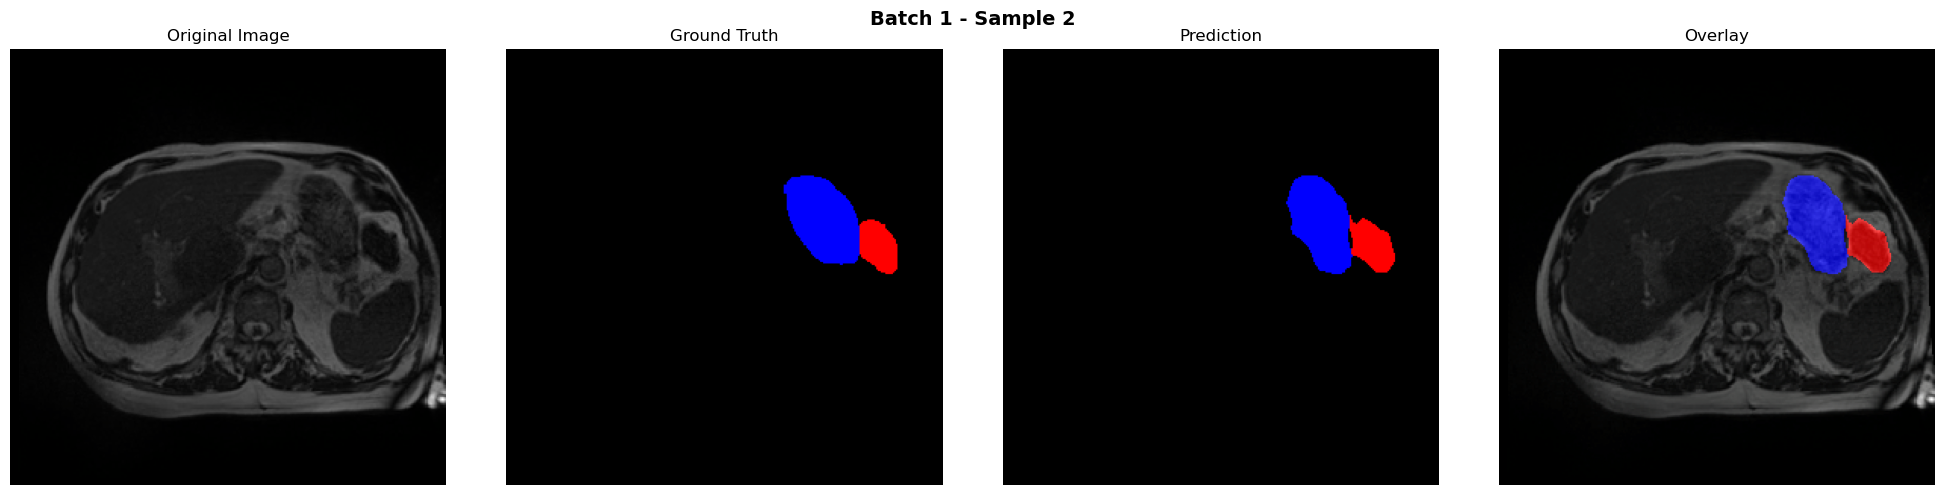


Processing batch 2/2...


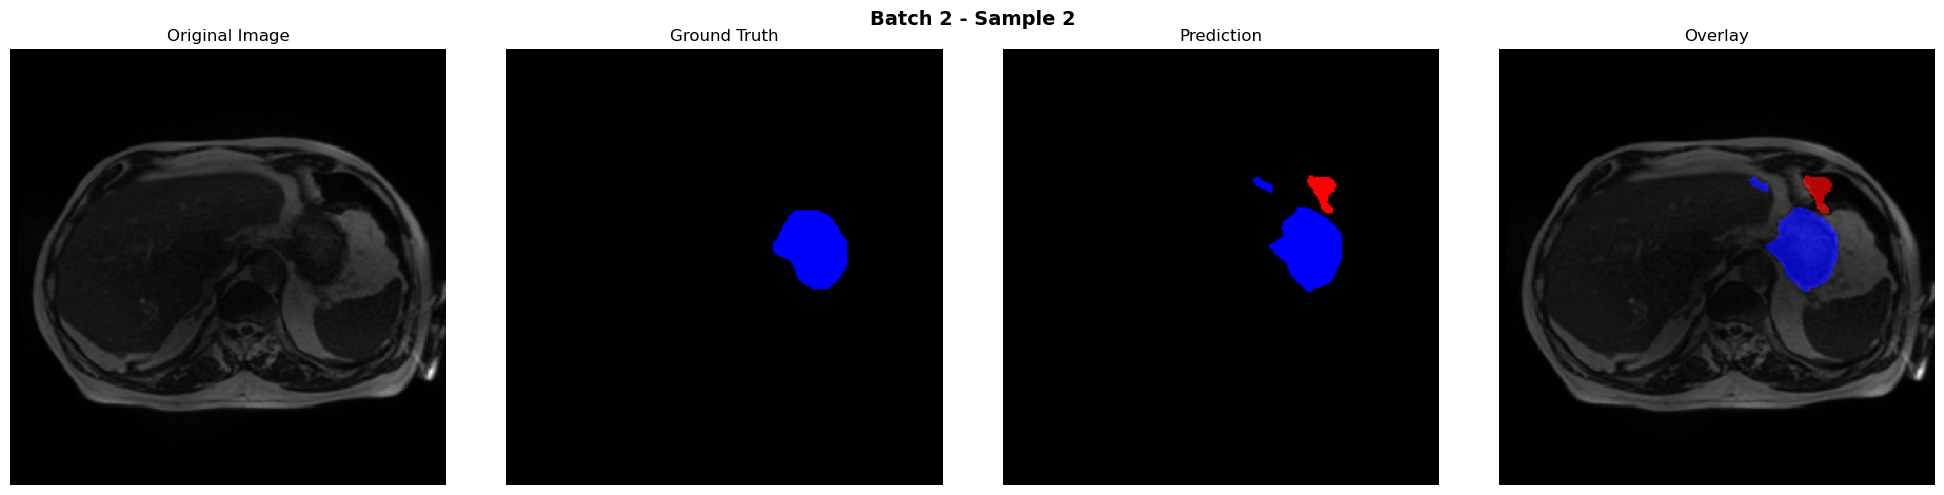

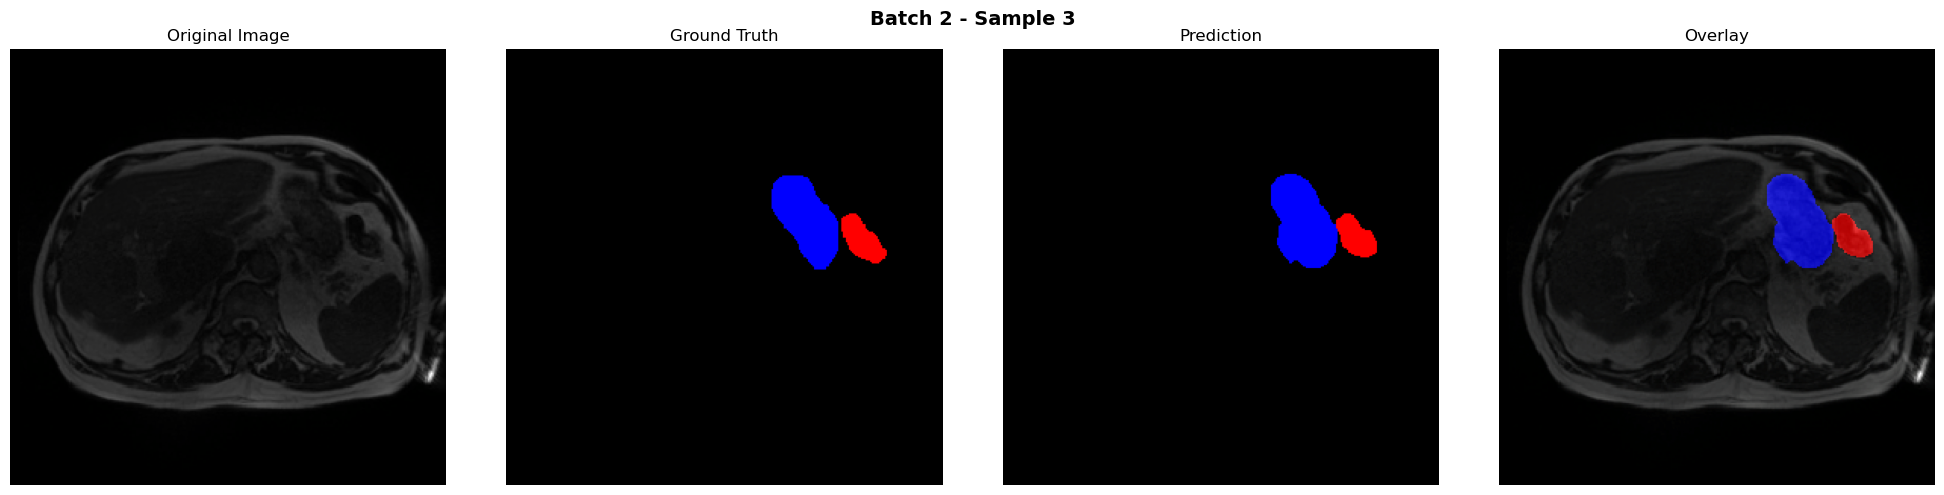


‚úì Inference and visualization completed!


In [31]:
# Á°Æ‰øùÊ®°ÂûãÂú®Ê≠£Á°ÆÁöÑËÆæÂ§á‰∏ä
model = model.to(DEVICE)
print(f"Model device: {next(model.parameters()).device}")

# ËøêË°åÊé®ÁêÜÂíåÂèØËßÜÂåñ
inference_and_visualize(
    model=model,
    loader=valid_loader,
    device=DEVICE,
    num_batches=InferenceConfig.NUM_BATCHES,
    samples_per_batch=3
)

## 9. Gradio Web Application

### 9.1 Introduction

Create interactive web applications using Gradio that support uploading medical images and obtaining real-time segmentation results.

**Features**:
- Upload medical images
- Real-time segmentation predictions
- Visualize results (mask + overlay)
- Category statistics

## 9. Gradio WebÂ∫îÁî®

### 9.1 ÁÆÄ‰ªã

‰ΩøÁî®GradioÂàõÂª∫‰∫§‰∫íÂºèWebÂ∫îÁî®ÔºåÊîØÊåÅ‰∏ä‰º†ÂåªÂ≠¶ÂõæÂÉèÂπ∂Ëé∑ÂæóÂÆûÊó∂ÂàÜÂâ≤ÁªìÊûú„ÄÇ

**ÂäüËÉΩÁâπÊÄß**:
- ‰∏ä‰º†ÂåªÂ≠¶ÂõæÂÉè
- ÂÆûÊó∂ÂàÜÂâ≤È¢ÑÊµã
- ÂèØËßÜÂåñÁªìÊûúÔºàÊé©Á†Å + Âè†Âä†Ôºâ
- Á±ªÂà´ÁªüËÆ°‰ø°ÊÅØ

In [32]:
import gradio as gr
print(f"GradioÁâàÊú¨: {gr.__version__}")

GradioÁâàÊú¨: 5.49.1


### 9.2 Defining Helper Functions
### 9.2 ÂÆö‰πâËæÖÂä©ÂáΩÊï∞

In [33]:
def preprocess_for_gradio(image: np.ndarray) -> torch.Tensor:
    """È¢ÑÂ§ÑÁêÜGradio‰∏ä‰º†ÁöÑÂõæÂÉè"""
    # Á°Æ‰øùÊòØRGBÊ†ºÂºè
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    # Ë∞ÉÊï¥Â§ßÂ∞è
    image_resized = cv2.resize(image, DatasetConfig.IMAGE_SIZE, interpolation=cv2.INTER_LINEAR)

    # ÂΩí‰∏ÄÂåñÂíåËΩ¨Êç¢‰∏∫Tensor
    transform = A.Compose([
        A.Normalize(mean=DatasetConfig.MEAN, std=DatasetConfig.STD, always_apply=True),
        ToTensorV2(),
    ])

    transformed = transform(image=image_resized)
    image_tensor = transformed["image"].unsqueeze(0)  # Ê∑ªÂä†ÊâπÊ¨°Áª¥Â∫¶

    return image_tensor, image  # ËøîÂõûtensorÂíåÂéüÂßãÂõæÂÉè


def get_class_statistics_gradio(mask: np.ndarray) -> str:
    """ËÆ°ÁÆóÂêÑÁ±ªÂà´ÁöÑÂÉèÁ¥†ÁªüËÆ°"""
    total_pixels = mask.size
    stats = ["## ÂàÜÂâ≤ÁªìÊûúÁªüËÆ°\n"]

    for class_id in range(DatasetConfig.NUM_CLASSES):
        count = np.sum(mask == class_id)
        percentage = (count / total_pixels) * 100
        stats.append(f"- **{id2name[class_id]}**: {percentage:.2f}% ({count:,} ÂÉèÁ¥†)")

    return "\n".join(stats)


print("‚úì ËæÖÂä©ÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ")

‚úì ËæÖÂä©ÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ


### 9.3 Defining Prediction Functions
### 9.3 ÂÆö‰πâÈ¢ÑÊµãÂáΩÊï∞

In [34]:
@torch.inference_mode()
def predict_gradio(image: np.ndarray) -> tuple:
    """
    GradioÈ¢ÑÊµãÂáΩÊï∞

    Args:
        image: ËæìÂÖ•ÁöÑRGBÂõæÂÉè (H, W, 3)

    Returns:
        mask_rgb: RGBÂàÜÂâ≤Êé©Á†Å
        overlay: Âè†Âä†ÂõæÂÉè
        stats: ÁªüËÆ°‰ø°ÊÅØÊñáÊú¨
    """
    if image is None:
        return None, None, "ËØ∑‰∏ä‰º†ÂõæÂÉè"

    try:
        # ‰øùÂ≠òÂéüÂßãÂ∞∫ÂØ∏
        original_height, original_width = image.shape[:2]

        # È¢ÑÂ§ÑÁêÜ
        image_tensor, _ = preprocess_for_gradio(image)
        image_tensor = image_tensor.to(DEVICE)

        # Êé®ÁêÜ
        logits = model(image_tensor)

        # Ëé∑ÂèñÈ¢ÑÊµãÁ±ªÂà´
        pred_mask = logits.argmax(dim=1).squeeze(0).cpu().numpy()

        # Ë∞ÉÊï¥Êé©Á†ÅÂà∞ÂéüÂßãÂ∞∫ÂØ∏
        pred_mask_resized = cv2.resize(
            pred_mask.astype(np.uint8),
            (original_width, original_height),
            interpolation=cv2.INTER_NEAREST
        )

        # ËΩ¨Êç¢‰∏∫RGBÊé©Á†Å
        mask_rgb = num_to_rgb(pred_mask_resized, color_map=id2color)

        # ÂàõÂª∫Âè†Âä†ÂõæÂÉè
        overlay = image_overlay(image / 255.0, mask_rgb / 255.0)

        # ËΩ¨Êç¢‰∏∫0-255ËåÉÂõ¥
        mask_rgb = (mask_rgb * 255).astype(np.uint8)
        overlay = (overlay * 255).astype(np.uint8)

        # ËÆ°ÁÆóÁªüËÆ°‰ø°ÊÅØ
        stats = get_class_statistics_gradio(pred_mask_resized)

        return mask_rgb, overlay, stats

    except Exception as e:
        return None, None, f"Â§ÑÁêÜÂ§±Ë¥•: {str(e)}"


print("‚úì È¢ÑÊµãÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ")

‚úì È¢ÑÊµãÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºÅ


### 9.4 Creating a Gradio Interface
### 9.4 ÂàõÂª∫GradioÁïåÈù¢

In [35]:
# ÂáÜÂ§áÈ™åËØÅÈõÜÁ§∫‰æãÂõæÁâá
import random
import os

print("Ê≠£Âú®ÂáÜÂ§áÈ™åËØÅÈõÜÁ§∫‰æãÂõæÁâá...")

# ‰ªéÈ™åËØÅÈõÜ‰∏≠ÈöèÊú∫ÈÄâÊã©Á§∫‰æãÂõæÁâá
valid_image_paths = data_module.valid_ds.image_paths

# ÈöèÊú∫ÈÄâÊã©6Âº†ÂõæÁâá‰Ωú‰∏∫Á§∫‰æã
num_examples = min(6, len(valid_image_paths))
example_images = random.sample(valid_image_paths, num_examples)

print(f"‚úì Â∑≤ÈÄâÊã© {num_examples} Âº†È™åËØÅÈõÜÂõæÁâá‰Ωú‰∏∫Á§∫‰æã")
print("Á§∫‰æãÂõæÁâá:")
for i, path in enumerate(example_images, 1):
    print(f"  {i}. {os.path.basename(path)}")

Ê≠£Âú®ÂáÜÂ§áÈ™åËØÅÈõÜÁ§∫‰æãÂõæÁâá...
‚úì Â∑≤ÈÄâÊã© 6 Âº†È™åËØÅÈõÜÂõæÁâá‰Ωú‰∏∫Á§∫‰æã
Á§∫‰æãÂõæÁâá:
  1. case55_day0_slice_0054_266_266_1.50_1.50.png
  2. case119_day21_slice_0069_266_266_1.50_1.50.png
  3. case108_day0_slice_0089_266_266_1.50_1.50.png
  4. case80_day14_slice_0112_266_266_1.50_1.50.png
  5. case138_day12_slice_0117_266_266_1.50_1.50.png
  6. case134_day22_slice_0069_360_310_1.50_1.50.png


In [36]:
# ÂàõÂª∫‰∏ì‰∏öÁöÑÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÁïåÈù¢
with gr.Blocks(
    title="Medical Image Segmentation - SegFormer",
    theme=gr.themes.Base(
        primary_hue="indigo",
        secondary_hue="blue",
        neutral_hue="slate",
        font=[gr.themes.GoogleFont("IBM Plex Sans"), "system-ui", "sans-serif"]
    ),
    css="""
        .main-header {
            background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
            padding: 2rem;
            border-radius: 15px;
            margin-bottom: 2rem;
            box-shadow: 0 4px 6px rgba(0,0,0,0.1);
        }
        .main-header h1 {
            color: white;
            text-align: center;
            font-size: 2.5rem;
            font-weight: 700;
            margin: 0;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
        }
        .main-header p {
            color: rgba(255,255,255,0.9);
            text-align: center;
            font-size: 1.1rem;
            margin-top: 0.5rem;
        }
        .legend-box {
            background: white;
            border: 2px solid #e2e8f0;
            border-radius: 10px;
            padding: 1rem;
            margin: 1rem 0;
        }
        .legend-item {
            display: flex;
            align-items: center;
            margin: 0.5rem 0;
            font-size: 1rem;
        }
        .legend-color {
            width: 30px;
            height: 30px;
            border-radius: 5px;
            margin-right: 10px;
            border: 2px solid #cbd5e0;
        }
        .stats-container {
            background: linear-gradient(135deg, #f6f8fb 0%, #e9ecef 100%);
            border-radius: 10px;
            padding: 1.5rem;
            margin-top: 1rem;
            border: 1px solid #dee2e6;
        }
        .output-section {
            border: 2px solid #e2e8f0;
            border-radius: 10px;
            padding: 1rem;
            background: white;
        }
        .upload-area {
            border: 3px dashed #cbd5e0 !important;
            border-radius: 15px !important;
            background: #f8f9fa !important;
            transition: all 0.3s ease;
        }
        .upload-area:hover {
            border-color: #667eea !important;
            background: #f0f4ff !important;
        }
        .example-gallery {
            margin-top: 2rem;
            padding: 1.5rem;
            background: white;
            border-radius: 10px;
            border: 1px solid #e2e8f0;
        }
    """
) as demo:

    # Ê†áÈ¢òÂå∫Âüü
    gr.HTML(
        """
        <div class="main-header">
            <h1>üè• Medical Image Segmentation System</h1>
            <p>AI-Powered GI Tract Segmentation using SegFormer Architecture</p>
        </div>
        """
    )

    with gr.Row():
        # Â∑¶‰æßÔºöËæìÂÖ•ÂíåÂõæ‰æã
        with gr.Column(scale=2):
            gr.Markdown("### üì§ Upload Medical Image")
            input_image = gr.Image(
                label="",
                type="numpy",
                height=400,
                sources=["upload", "clipboard"],
                elem_classes="upload-area"
            )

            # Âõæ‰æãËØ¥Êòé
            gr.HTML(
                """
                <div class="legend-box">
                    <h4 style="margin-top:0; color:#1e293b;">üé® Segmentation Legend</h4>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#000000;"></div>
                        <span><strong>Background</strong> - Image background</span>
                    </div>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#ff0000;"></div>
                        <span><strong>Stomach</strong> - Gastric region</span>
                    </div>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#00ff00;"></div>
                        <span><strong>Small Bowel</strong> - Small intestine</span>
                    </div>
                    <div class="legend-item">
                        <div class="legend-color" style="background-color:#0000ff;"></div>
                        <span><strong>Large Bowel</strong> - Large intestine</span>
                    </div>
                </div>
                """
            )

            with gr.Row():
                clear_btn = gr.Button(
                    "üóëÔ∏è Clear",
                    variant="secondary",
                    size="sm"
                )
                submit_btn = gr.Button(
                    "üöÄ Run Segmentation",
                    variant="primary",
                    size="lg",
                    scale=3
                )

        # Âè≥‰æßÔºöËæìÂá∫ÁªìÊûú
        with gr.Column(scale=3):
            gr.Markdown("### üìä Segmentation Results")

            with gr.Tabs() as tabs:
                with gr.Tab("üé® Segmentation Mask"):
                    output_mask = gr.Image(
                        label="",
                        height=400,
                        elem_classes="output-section"
                    )

                with gr.Tab("üñºÔ∏è Overlay View"):
                    output_overlay = gr.Image(
                        label="",
                        height=400,
                        elem_classes="output-section"
                    )

            # ÁªüËÆ°‰ø°ÊÅØ
            gr.Markdown("### üìà Pixel Statistics")
            output_stats = gr.Markdown(
                value="<div style='text-align:center; color:#64748b; padding:2rem;'>‚ÑπÔ∏è Upload an image and click <strong>Run Segmentation</strong> to see results</div>",
                elem_classes="stats-container"
            )

    # ‰∫ã‰ª∂ÁªëÂÆö
    submit_btn.click(
        fn=predict_gradio,
        inputs=input_image,
        outputs=[output_mask, output_overlay, output_stats]
    )

    clear_btn.click(
        fn=lambda: (None, None, None, "<div style='text-align:center; color:#64748b; padding:2rem;'>‚ÑπÔ∏è Upload an image and click <strong>Run Segmentation</strong> to see results</div>"),
        outputs=[input_image, output_mask, output_overlay, output_stats]
    )

    # Á§∫‰æãÂõæÁâáÂå∫Âüü
    gr.HTML('<div class="example-gallery">')
    gr.Markdown("### üñºÔ∏è Try These Examples")
    gr.Markdown("Click any image below to test the segmentation model on validation dataset samples")
    gr.Examples(
        examples=example_images,
        inputs=input_image,
        outputs=[output_mask, output_overlay, output_stats],
        fn=predict_gradio,
        cache_examples=False,
        label="",
        examples_per_page=6
    )
    gr.HTML('</div>')

    # Â∫ïÈÉ®‰ø°ÊÅØ
    with gr.Accordion("‚ÑπÔ∏è About This Application", open=False):
        gr.Markdown(
            """
            ## üî¨ Technical Details

            ### Model Architecture
            - **Base Model**: SegFormer-B0 (NVIDIA)
            - **Parameters**: ~4M
            - **Framework**: PyTorch Lightning + HuggingFace Transformers
            - **Input Size**: 288√ó288 pixels
            - **Output**: 4-class semantic segmentation

            ### Dataset
            - **Source**: UWM-Madison GI Tract Image Segmentation
            - **Classes**: Background, Stomach, Small Bowel, Large Bowel
            - **Training**: Mixed precision (FP16)
            - **Batch Size**: 6 (optimized for 8GB GPU)

            ### Performance
            - **Inference Speed**: ~50-100ms per image (GPU)
            - **Precision**: 16-bit mixed precision
            - **GPU Acceleration**: CUDA enabled

            ### Usage Instructions
            1. **Upload**: Click the upload area or drag & drop a medical image
            2. **Run**: Click the "Run Segmentation" button
            3. **View**: Switch between tabs to see mask and overlay
            4. **Analyze**: Check pixel statistics below the results

            ### Supported Formats
            - PNG, JPG, JPEG
            - Recommended size: 256√ó256 to 512√ó512
            - Images are automatically resized to 288√ó288

            ---

            **Developed with** PyTorch Lightning ‚Ä¢ Gradio ‚Ä¢ HuggingFace
            **Last Updated**: October 2025 ‚Ä¢ **Version**: 1.0
            """
        )

print("‚úì ‰∏ì‰∏öÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÁïåÈù¢ÂàõÂª∫ÂÆåÊàêÔºÅ")


‚úì ‰∏ì‰∏öÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÁïåÈù¢ÂàõÂª∫ÂÆåÊàêÔºÅ


### 9.4 Lunching a Gradio Interface
### 9.4 ÂêØÂä®GradioÁïåÈù¢

In [37]:
# ÂêØÂä®GradioÁïåÈù¢
print("="*70)
print("ÂáÜÂ§áÂêØÂä®GradioÁïåÈù¢")
print("="*70)

# ÂÖàÂÖ≥Èó≠‰πãÂâçÁöÑÁïåÈù¢ÔºàÂ¶ÇÊûúÊúâÔºâ
try:
    demo.close()
    print("‚úì Â∑≤ÂÖ≥Èó≠‰πãÂâçËøêË°åÁöÑÁïåÈù¢")
    import time
    time.sleep(1)  # Á≠âÂæÖÁ´ØÂè£ÈáäÊîæ
except Exception as e:
    print("‚ÑπÔ∏è Ê≤°ÊúâËøêË°å‰∏≠ÁöÑÁïåÈù¢ÈúÄË¶ÅÂÖ≥Èó≠")

print("Ê≠£Âú®ÂêØÂä®Êñ∞ÁïåÈù¢...")
print("ÁïåÈù¢Â∞ÜÂú®ÊµèËßàÂô®‰∏≠Ëá™Âä®ÊâìÂºÄ")
print("Â¶ÇÊûúÊ≤°ÊúâËá™Âä®ÊâìÂºÄÔºåËØ∑Â§çÂà∂‰∏ãÊñπÁöÑURLÂú®ÊµèËßàÂô®‰∏≠ÊâìÂºÄ")
print("-" * 70)

demo.launch(
    share=True,           # ÂàõÂª∫ÂÖ¨ÂÖ±ÈìæÊé•
    inbrowser=True,       # Ëá™Âä®Âú®ÊµèËßàÂô®‰∏≠ÊâìÂºÄ
    show_error=True       # ÊòæÁ§∫ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ
    # ‰∏çÊåáÂÆöserver_portÔºåËÆ©GradioËá™Âä®ÈÄâÊã©ÂèØÁî®Á´ØÂè£
)


ÂáÜÂ§áÂêØÂä®GradioÁïåÈù¢
‚úì Â∑≤ÂÖ≥Èó≠‰πãÂâçËøêË°åÁöÑÁïåÈù¢
Ê≠£Âú®ÂêØÂä®Êñ∞ÁïåÈù¢...
ÁïåÈù¢Â∞ÜÂú®ÊµèËßàÂô®‰∏≠Ëá™Âä®ÊâìÂºÄ
Â¶ÇÊûúÊ≤°ÊúâËá™Âä®ÊâìÂºÄÔºåËØ∑Â§çÂà∂‰∏ãÊñπÁöÑURLÂú®ÊµèËßàÂô®‰∏≠ÊâìÂºÄ
----------------------------------------------------------------------
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://5e2bf73d452644b5ff.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Terminate the wandb experiment run.

ÁªàÊ≠¢wandbÂÆûÈ™åËøêË°å„ÄÇ

In [ ]:
# ÂÖ≥Èó≠WandB‰ºöËØùÔºànotebookÁªìÊùüÊó∂ËøêË°åÔºâ
print("=" * 70)
print("ÂÖ≥Èó≠WandB‰ºöËØù")
print("=" * 70)

if USE_WANDB:
    try:
        if wandb.run is not None:
            wandb.run.finish()
            print("‚úì WandB‰ºöËØùÂ∑≤ÊàêÂäüÂÖ≥Èó≠")
        else:
            print("‚ÑπÔ∏è WandB‰ºöËØùÊú™ÂêØÂä®ÊàñÂ∑≤ÂÖ≥Èó≠")
    except Exception as e:
        print(f"‚ö†Ô∏è ÂÖ≥Èó≠WandBÊó∂Âá∫Èîô: {e}")
else:
    print("‚ÑπÔ∏è Êú™‰ΩøÁî®WandBÔºåÊó†ÈúÄÂÖ≥Èó≠‰ºöËØù")

print(" " + "=" * 70)
print("NotebookÊâßË°åÂÆåÊØïÔºÅ")
print("=" * 70)

## 10 Summary

Medical image segmentation using deep learning provides significant advantages. Deep learning models excel at capturing complex patterns and features, leading to highly accurate and precise segmentation results compared to traditional methods. Additionally, deep learning algorithms automate segmentation, improving efficiency and enabling analysis of large volumes of medical image data. Moreover, deep learning models demonstrate adaptability and generalization, making them suitable for diverse image characteristics, imaging modalities, patient populations, and clinical settings, expanding their utility in medical imaging applications.

To summarise this articleüìú, we covered a comprehensive list of related topics:

1. Medical Image Segmentation: Explored the definition and challenges of medical image segmentation.
2. Dataset Preparation: Used the UW-Madison GI Tract segmentation dataset, made observations, and created preprocessed training and validation sets.
3. We defined a few essential functions and classes for PyTorch and PyTorch-Lightning frameworks to facilitate ease of training.
4. We learned how to use the Segformer model from Hugging Face transformers for segmentation and fine-tuned it on our dataset.
5. We defined a custom loss function combining the Dice coefficient with cross-entropy for improved segmentation performance.
6. Training and Metrics Tracking: Trained the model, monitored metrics using WandB, and uploaded the model as an artifact for future use.
7. We designed a user-friendly interface using the Gradio app, making our medical multi-label image classification model accessible to everyone.

## 10 ÊÄªÁªì

Âü∫‰∫éÊ∑±Â∫¶Â≠¶‰π†ÁöÑÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÊäÄÊúØÂÖ∑ÊúâÊòæËëó‰ºòÂäø„ÄÇÁõ∏ËæÉ‰∫é‰º†ÁªüÊñπÊ≥ïÔºåÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂú®ÊçïÊçâÂ§çÊùÇÊ®°Âºè‰∏éÁâπÂæÅÊñπÈù¢Ë°®Áé∞ÂçìË∂äÔºå‰ªéËÄåÂÆûÁé∞È´òÂ∫¶Á≤æÁ°ÆÁöÑÂàÜÂâ≤ÁªìÊûú„ÄÇÊ≠§Â§ñÔºåÊ∑±Â∫¶Â≠¶‰π†ÁÆóÊ≥ïÈÄöËøáËá™Âä®ÂåñÂàÜÂâ≤ÊµÅÁ®ãÊèêÂçáÊïàÁéáÔºå‰ΩøÊµ∑ÈáèÂåªÂ≠¶ÂõæÂÉèÊï∞ÊçÆÁöÑÂàÜÊûêÊàê‰∏∫ÂèØËÉΩ„ÄÇÊõ¥ÈáçË¶ÅÁöÑÊòØÔºåÊ∑±Â∫¶Â≠¶‰π†Ê®°ÂûãÂ±ïÁé∞Âá∫ÈÄÇÂ∫îÊÄßÂíåÊ≥õÂåñËÉΩÂäõÔºå‰ΩøÂÖ∂ÈÄÇÁî®‰∫éÂ§öÊ†∑ÂåñÁöÑÂõæÂÉèÁâπÂæÅ„ÄÅÊàêÂÉèÊ®°Âºè„ÄÅÊÇ£ËÄÖÁæ§‰ΩìÂèä‰∏¥Â∫äÂú∫ÊôØÔºåÊãìÂ±ï‰∫ÜÂÖ∂Âú®ÂåªÂ≠¶ÂΩ±ÂÉèÈ¢ÜÂüüÁöÑÂ∫îÁî®‰ª∑ÂÄº„ÄÇ

Êú¨ÊñáüìúÊ∂µÁõñ‰∫Ü‰ª•‰∏ãÊ†∏ÂøÉËÆÆÈ¢òÔºö

1. ÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÔºöÈòêÈáäÂåªÂ≠¶ÂõæÂÉèÂàÜÂâ≤ÁöÑÂÆö‰πâ‰∏éÊåëÊàò„ÄÇ
2. Êï∞ÊçÆÈõÜÂáÜÂ§áÔºöÈááÁî®Â®ÅÊñØÂ∫∑ÊòüÂ§ßÂ≠¶È∫¶Ëø™ÈÄäÂàÜÊ†°Ê∂àÂåñÈÅìÂàÜÂâ≤Êï∞ÊçÆÈõÜÔºåËøõË°åËßÇÂØüÂàÜÊûêÂπ∂ÂàõÂª∫È¢ÑÂ§ÑÁêÜÂêéÁöÑËÆ≠ÁªÉÈõÜ‰∏éÈ™åËØÅÈõÜ„ÄÇ
3. ÂÆö‰πâ‰∫ÜPyTorchÂèäPyTorch-LightningÊ°ÜÊû∂‰∏≠Ëã•Âπ≤Ê†∏ÂøÉÂáΩÊï∞‰∏éÁ±ªÔºå‰ª•ÁÆÄÂåñËÆ≠ÁªÉÊµÅÁ®ã„ÄÇ
4. Â≠¶‰π†‰ΩøÁî®Hugging Face transformers‰∏≠ÁöÑSegformerÊ®°ÂûãËøõË°åÂàÜÂâ≤ÔºåÂπ∂Âú®Êú¨Êï∞ÊçÆÈõÜ‰∏äËøõË°åÂæÆË∞É„ÄÇ
5. ÂÆö‰πâ‰∫ÜÁªìÂêàDiceÁ≥ªÊï∞‰∏é‰∫§ÂèâÁÜµÁöÑËá™ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞Ôºå‰ª•ÊèêÂçáÂàÜÂâ≤ÊÄßËÉΩ„ÄÇ
6. ËÆ≠ÁªÉ‰∏éÊåáÊ†áËøΩË∏™ÔºöÂÆåÊàêÊ®°ÂûãËÆ≠ÁªÉÔºåÈÄöËøáWandBÁõëÊéßÊåáÊ†áÔºåÂπ∂Â∞ÜÊ®°Âûã‰Ωú‰∏∫ÊàêÊûú‰∏ä‰º†‰ª•‰æõÂêéÁª≠‰ΩøÁî®„ÄÇ
7. ËøêÁî®GradioÂ∫îÁî®ËÆæËÆ°Áî®Êà∑ÂèãÂ•ΩÁïåÈù¢Ôºå‰ΩøÊàë‰ª¨ÁöÑÂåªÂ≠¶Â§öÊ†áÁ≠æÂõæÂÉèÂàÜÁ±ªÊ®°ÂûãÂèØ‰æõÊâÄÊúâ‰∫∫‰ΩøÁî®„ÄÇ